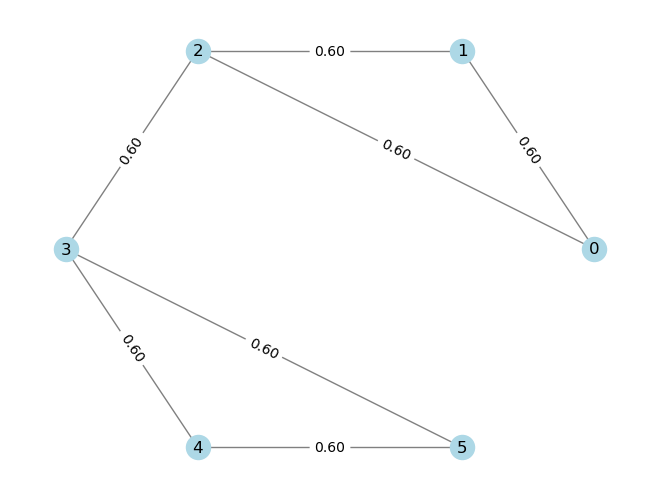

tensor(5.0400)
[[ 1.2       -0.6       -0.6       -0.        -0.        -0.       ]
 [-0.6        1.2       -0.6       -0.        -0.        -0.       ]
 [-0.6       -0.6        1.8000001 -0.6       -0.        -0.       ]
 [-0.        -0.        -0.6        1.8000001 -0.6       -0.6      ]
 [-0.        -0.        -0.        -0.6        1.2       -0.6      ]
 [-0.        -0.        -0.        -0.6       -0.6        1.2      ]]
tensor([[ 1.2000, -0.6000, -0.6000, -0.0000, -0.0000, -0.0000],
        [-0.6000,  1.2000, -0.6000, -0.0000, -0.0000, -0.0000],
        [-0.6000, -0.6000,  1.8000, -0.6000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.6000,  1.8000, -0.6000, -0.6000],
        [-0.0000, -0.0000, -0.0000, -0.6000,  1.2000, -0.6000],
        [-0.0000, -0.0000, -0.0000, -0.6000, -0.6000,  1.2000]]) tensor([[24838954., 24838956., 24838946., 24838938., 24838932., 24838930.],
        [24838954., 24838958., 24838946., 24838938., 24838932., 24838930.],
        [24838954., 24838956., 24

In [1]:
from GEM_module import GEM
from utils import *
from scipy.sparse.csgraph import laplacian
from sparsemax import Sparsemax

# seed
torch.manual_seed(42)
torch.random.manual_seed(42)

# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# generate synthetic data
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[4,5],[3,5]]
edges = torch.tensor(edges)
weights = torch.tensor([0.6]*len(edges))
num_nodes = 6
adj = generate_graph_from_edges(num_nodes, edges, weights)
print(adj.norm()**2)
L = laplacian(adj.numpy(), normed=False)
print(L)
# generate data
sigma = 0.4
mu = sigma ** 2
n = 128
y = generate_y(num_nodes, sigma, L, n)

In [2]:
def Experiment(arg_dict, num_node, S_init=None, seed=42):
    mu = arg_dict['mu']
    gamma = arg_dict['gamma']
    step_size = arg_dict['step_size']
    PGD_step_size = arg_dict['PGD_step_size']
    c = arg_dict['c']
    PGD_iters = arg_dict['PGD_iters']
    use_block_coordinate = arg_dict['use_block_coordinate']
    torch.manual_seed(seed)
    torch.random.manual_seed(seed)
    gem = GEM(num_nodes, mu=mu, gamma=gamma, step_size=step_size, c=c, PGD_iters=PGD_iters, PGD_step_size=PGD_step_size, use_block_coordinate=use_block_coordinate, scale=True)
    torch.manual_seed(42)
    # initialize adjacency and S
    # adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
    if S_init is None:
        S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
 
    x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
    W_final = adj_final * S_final
    print("Final learned mask:")
    print(S_final, S_final.norm()**2, Sparsemax(dim=1)(S_final))
    print("Final learned adjacency matrix:")
    print(W_final, W_final.norm()**2)

# 6-node graph experiments - PGD (w/o BCD)
Settings: All random seed 42. 128 data points. Generating noise $\sigma=0.4$ (variance 0.16).

Testing parameters:
- GLR strength: $\mu=0.2, 0.1, 0.4$ (suitable, low, high)
- PGD step size $\eta=0.01, 0.02$ combined with iterations $N=100, 50$
- Sparsity control $\gamma=0.4, 0.2, 0.6$



Iteration 1/5
after E-step: delta_W norm 0.1612, GLR 7.1574, adj norm^2 5.4349
after M-step-1: delta_W norm 0.4211, GLR 7.7510, adj norm^2 5.7867
PGD iter 1/50, ||S_new - S||_F = 0.0555
PGD iter 21/50, ||S_new - S||_F = 0.0513
PGD iter 41/50, ||S_new - S||_F = 0.0452
tensor([[0.0000, 0.7112, 0.6502, 0.5000, 0.4420, 0.5340],
        [0.7112, 0.0000, 0.7128, 0.4916, 0.4011, 0.3759],
        [0.6502, 0.7128, 0.0000, 0.6131, 0.5346, 0.4270],
        [0.5000, 0.4916, 0.6131, 0.0000, 0.7126, 0.6604],
        [0.4420, 0.4011, 0.5346, 0.7126, 0.0000, 0.6810],
        [0.5340, 0.3759, 0.4270, 0.6604, 0.6810, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.7104, grad_fn=<PowBackward0>)


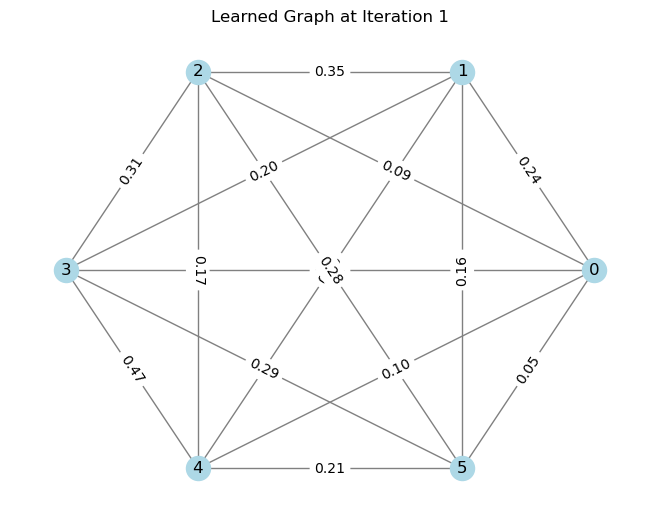

Iteration 2/5
after E-step: delta_W norm 0.4610, GLR 6.5751, adj norm^2 5.3467
after M-step-1: delta_W norm 0.3703, GLR 6.9987, adj norm^2 5.3735
PGD iter 1/50, ||S_new - S||_F = 0.0819
PGD iter 21/50, ||S_new - S||_F = 0.0746
PGD iter 41/50, ||S_new - S||_F = 0.0590
tensor([[0.0000, 0.6871, 0.6336, 0.3280, 0.2264, 0.4802],
        [0.6871, 0.0000, 0.6343, 0.2438, 0.0962, -0.0000],
        [0.6336, 0.6343, 0.0000, 0.4847, 0.3934, 0.1200],
        [0.3280, 0.2438, 0.4847, 0.0000, 0.6295, 0.5901],
        [0.2264, 0.0962, 0.3934, 0.6295, 0.0000, 0.6493],
        [0.4802, -0.0000, 0.1200, 0.5901, 0.6493, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.1446, grad_fn=<PowBackward0>)


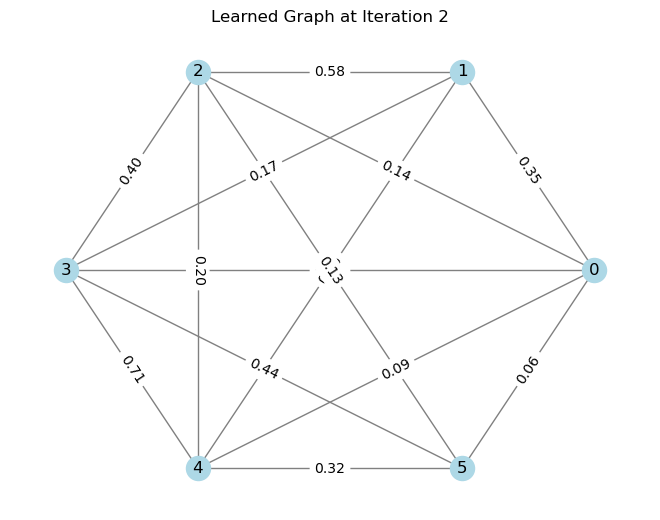

Iteration 3/5
after E-step: delta_W norm 0.4071, GLR 5.1200, adj norm^2 5.0847
after M-step-1: delta_W norm 0.7149, GLR 5.9022, adj norm^2 5.6273
PGD iter 1/50, ||S_new - S||_F = 0.1117
PGD iter 21/50, ||S_new - S||_F = 0.1005
PGD iter 41/50, ||S_new - S||_F = 0.0498
tensor([[0.0000, 0.6301, 0.6194, 0.1670, 0.0706, 0.3108],
        [0.6301, 0.0000, 0.6066, 0.0422, -0.0000, -0.0000],
        [0.6194, 0.6066, 0.0000, 0.3793, 0.2131, -0.0000],
        [0.1670, 0.0422, 0.3793, 0.0000, 0.5940, 0.5229],
        [0.0706, -0.0000, 0.2131, 0.5940, 0.0000, 0.6203],
        [0.3108, -0.0000, -0.0000, 0.5229, 0.6203, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.9486, grad_fn=<PowBackward0>)


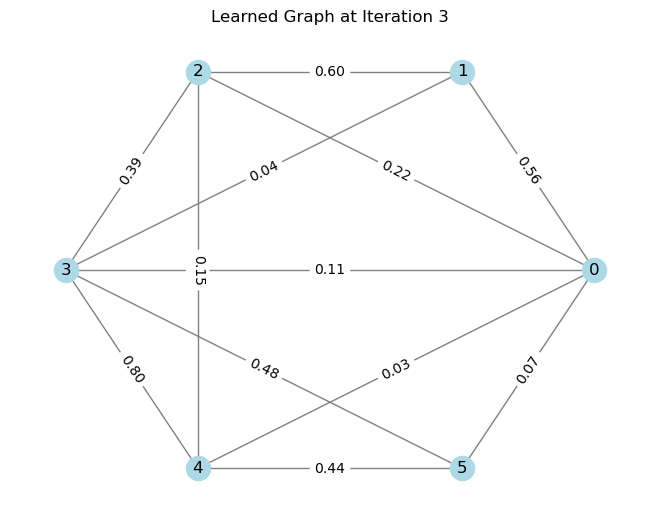

Iteration 4/5
after E-step: delta_W norm 0.7279, GLR 3.8093, adj norm^2 4.8989
after M-step-1: delta_W norm 1.2176, GLR 4.8963, adj norm^2 5.6369
PGD iter 1/50, ||S_new - S||_F = 0.1248
PGD iter 21/50, ||S_new - S||_F = 0.1125
PGD iter 41/50, ||S_new - S||_F = 0.0451
tensor([[0.0000, 0.5631, 0.5919, 0.0303, -0.0000, -0.0000],
        [0.5631, 0.0000, 0.5876, 0.0732, -0.0000, -0.0000],
        [0.5919, 0.5876, 0.0000, 0.3247, 0.2283, 0.0000],
        [0.0303, 0.0732, 0.3247, 0.0000, 0.5984, 0.4874],
        [-0.0000, -0.0000, 0.2283, 0.5984, 0.0000, 0.6216],
        [-0.0000, -0.0000, 0.0000, 0.4874, 0.6216, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.4060, grad_fn=<PowBackward0>)


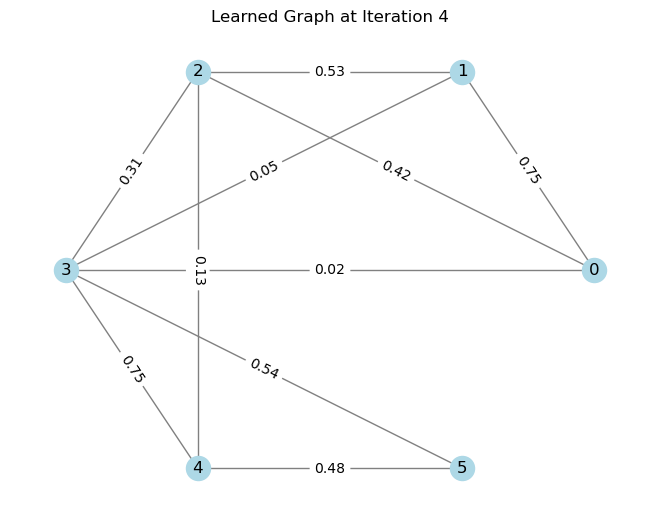

Iteration 5/5
after E-step: delta_W norm 1.1546, GLR 3.6146, adj norm^2 4.8132
after M-step-1: delta_W norm 1.2109, GLR 3.8313, adj norm^2 5.8140
PGD iter 1/50, ||S_new - S||_F = 0.1311
PGD iter 21/50, ||S_new - S||_F = 0.1181
PGD iter 41/50, ||S_new - S||_F = 0.0433
tensor([[0.0000, 0.5737, 0.5925, 0.0000, -0.0000, 0.0000],
        [0.5737, 0.0000, 0.5810, 0.0606, -0.0000, -0.0000],
        [0.5925, 0.5810, 0.0000, 0.2961, 0.1553, 0.0000],
        [0.0000, 0.0606, 0.2961, 0.0000, 0.5718, 0.4741],
        [-0.0000, -0.0000, 0.1553, 0.5718, 0.0000, 0.5994],
        [0.0000, -0.0000, 0.0000, 0.4741, 0.5994, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.7973, grad_fn=<PowBackward0>)


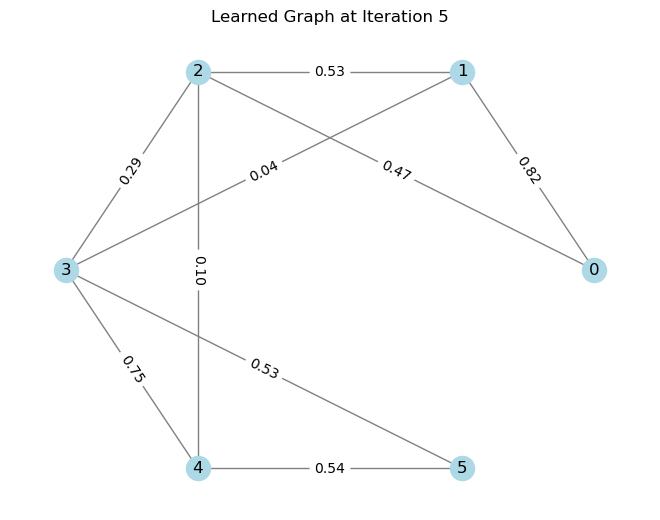

Final learned mask:
tensor([[0.0000, 0.5737, 0.5925, 0.0000, -0.0000, 0.0000],
        [0.5737, 0.0000, 0.5810, 0.0606, -0.0000, -0.0000],
        [0.5925, 0.5810, 0.0000, 0.2961, 0.1553, 0.0000],
        [0.0000, 0.0606, 0.2961, 0.0000, 0.5718, 0.4741],
        [-0.0000, -0.0000, 0.1553, 0.5718, 0.0000, 0.5994],
        [0.0000, -0.0000, 0.0000, 0.4741, 0.5994, 0.0000]],
       grad_fn=<CopySlices>) tensor(4.0884, grad_fn=<PowBackward0>) tensor([[0.0000, 0.4906, 0.5094, 0.0000, 0.0000, 0.0000],
        [0.4964, 0.0000, 0.5036, 0.0000, 0.0000, 0.0000],
        [0.4360, 0.4245, 0.0000, 0.1396, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1821, 0.0000, 0.4578, 0.3601],
        [0.0000, 0.0000, 0.0464, 0.4630, 0.0000, 0.4906],
        [0.0000, 0.0000, 0.0000, 0.4374, 0.5626, 0.0000]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.8248, 0.4678, 0.0000, -0.0000, 0.0000],
        [0.8248, 0.0000, 0.5314, 0.0405, -0.0000, -0.0000],
        [0.46

In [3]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1612, GLR 7.1574, adj norm^2 5.4349
after M-step-1: delta_W norm 0.4211, GLR 7.7510, adj norm^2 5.7867
PGD iter 1/50, ||S_new - S||_F = 0.1110
PGD iter 21/50, ||S_new - S||_F = 0.0903
PGD iter 41/50, ||S_new - S||_F = 0.0501
tensor([[0.0000, 0.6023, 0.3927, 0.2076, 0.0851, 0.1566],
        [0.6023, 0.0000, 0.6069, 0.2030, 0.0586, 0.0582],
        [0.3927, 0.6069, 0.0000, 0.4046, 0.2280, 0.2160],
        [0.2076, 0.2030, 0.4046, 0.0000, 0.6003, 0.4917],
        [0.0851, 0.0586, 0.2280, 0.6003, 0.0000, 0.5048],
        [0.1566, 0.0582, 0.2160, 0.4917, 0.5048, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.8699, grad_fn=<PowBackward0>)


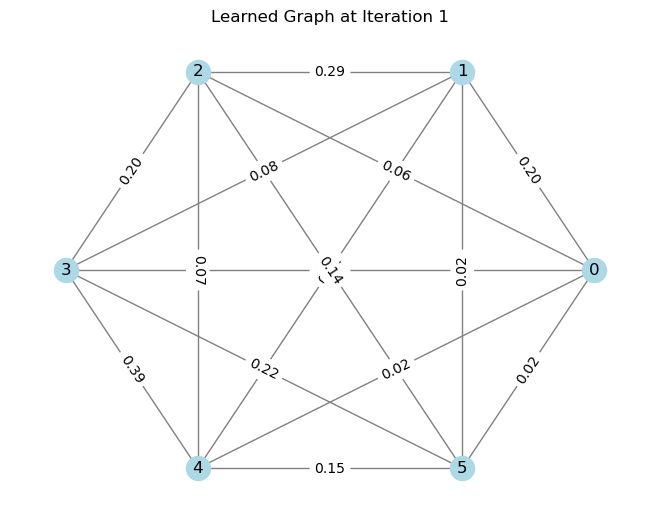

Iteration 2/5
after E-step: delta_W norm 0.4848, GLR 4.9933, adj norm^2 5.1192
after M-step-1: delta_W norm 0.8543, GLR 5.5071, adj norm^2 5.6802
PGD iter 1/50, ||S_new - S||_F = 0.2391
PGD iter 21/50, ||S_new - S||_F = 0.0886
PGD iter 41/50, ||S_new - S||_F = 0.0181
tensor([[0.0000, 0.4672, 0.4022, 0.0318, 0.0000, 0.0000],
        [0.4672, 0.0000, 0.4931, 0.0016, 0.0000, 0.0000],
        [0.4022, 0.4931, 0.0000, 0.3742, 0.0030, 0.0769],
        [0.0318, 0.0016, 0.3742, 0.0000, 0.4667, 0.3512],
        [0.0000, 0.0000, 0.0030, 0.4667, 0.0000, 0.4617],
        [0.0000, 0.0000, 0.0769, 0.3512, 0.4617, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.0393, grad_fn=<PowBackward0>)


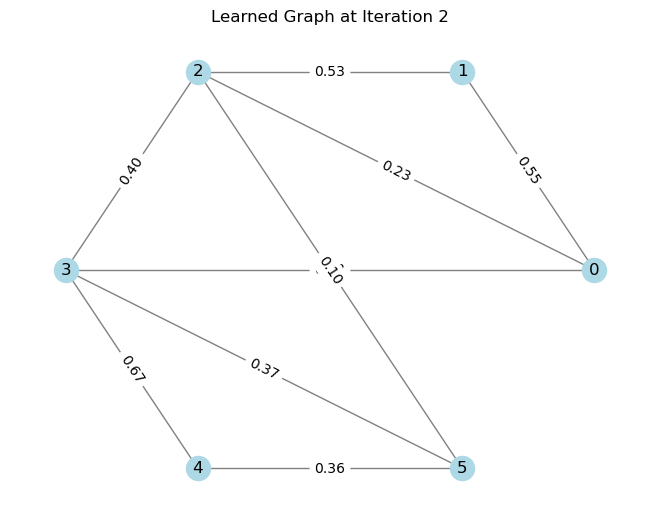

Iteration 3/5
after E-step: delta_W norm 0.8668, GLR 3.5676, adj norm^2 4.8600
after M-step-1: delta_W norm 1.1812, GLR 3.8592, adj norm^2 5.9129
PGD iter 1/50, ||S_new - S||_F = 0.3219
PGD iter 21/50, ||S_new - S||_F = 0.0571
PGD iter 41/50, ||S_new - S||_F = 0.0121
tensor([[0.0000, 0.3758, 0.3799, 0.0000, 0.0000, 0.0000],
        [0.3758, 0.0000, 0.4205, 0.0000, 0.0000, 0.0000],
        [0.3799, 0.4205, 0.0000, 0.3330, 0.0000, 0.0363],
        [0.0000, 0.0000, 0.3330, 0.0000, 0.4051, 0.2514],
        [0.0000, 0.0000, 0.0000, 0.4051, 0.0000, 0.4174],
        [0.0000, 0.0000, 0.0363, 0.2514, 0.4174, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.5508, grad_fn=<PowBackward0>)


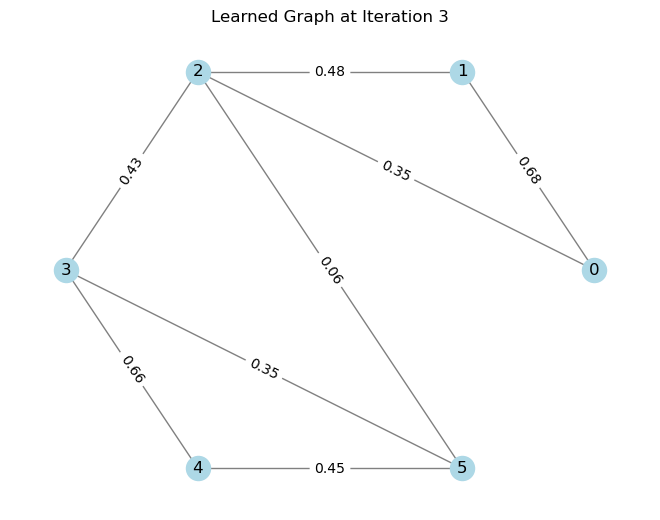

Iteration 4/5
after E-step: delta_W norm 1.1704, GLR 3.3927, adj norm^2 4.8061
after M-step-1: delta_W norm 1.2307, GLR 3.6638, adj norm^2 6.0382
PGD iter 1/50, ||S_new - S||_F = 0.3631
PGD iter 21/50, ||S_new - S||_F = 0.0521
PGD iter 41/50, ||S_new - S||_F = 0.0096
tensor([[0.0000, 0.3466, 0.3564, 0.0000, 0.0000, 0.0000],
        [0.3466, 0.0000, 0.3629, 0.0000, 0.0000, 0.0000],
        [0.3564, 0.3629, 0.0000, 0.3011, 0.0000, 0.0230],
        [0.0000, 0.0000, 0.3011, 0.0000, 0.3606, 0.2052],
        [0.0000, 0.0000, 0.0000, 0.3606, 0.0000, 0.3861],
        [0.0000, 0.0000, 0.0230, 0.2052, 0.3861, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.0527, grad_fn=<PowBackward0>)


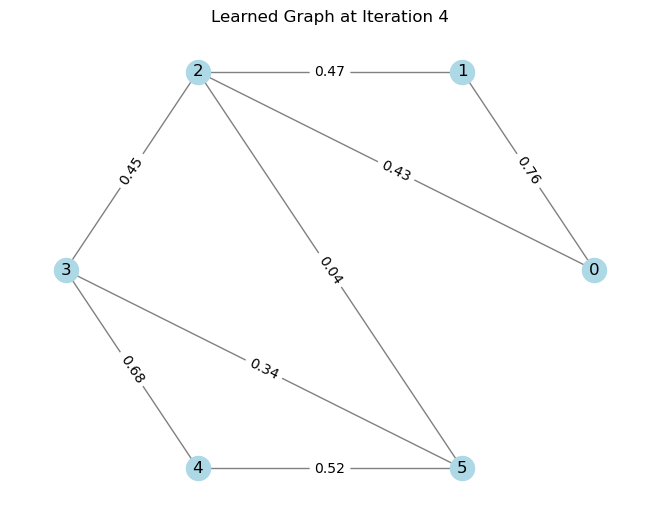

Iteration 5/5
after E-step: delta_W norm 1.2611, GLR 3.3764, adj norm^2 4.7835
after M-step-1: delta_W norm 1.2648, GLR 3.5919, adj norm^2 6.0130
PGD iter 1/50, ||S_new - S||_F = 0.3973
PGD iter 21/50, ||S_new - S||_F = 0.0530
PGD iter 41/50, ||S_new - S||_F = 0.0082
tensor([[0.0000, 0.3248, 0.3433, 0.0000, 0.0000, 0.0000],
        [0.3248, 0.0000, 0.3275, 0.0000, 0.0000, 0.0000],
        [0.3433, 0.3275, 0.0000, 0.2815, 0.0000, 0.0177],
        [0.0000, 0.0000, 0.2815, 0.0000, 0.3323, 0.1833],
        [0.0000, 0.0000, 0.0000, 0.3323, 0.0000, 0.3747],
        [0.0000, 0.0000, 0.0177, 0.1833, 0.3747, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.3616, grad_fn=<PowBackward0>)


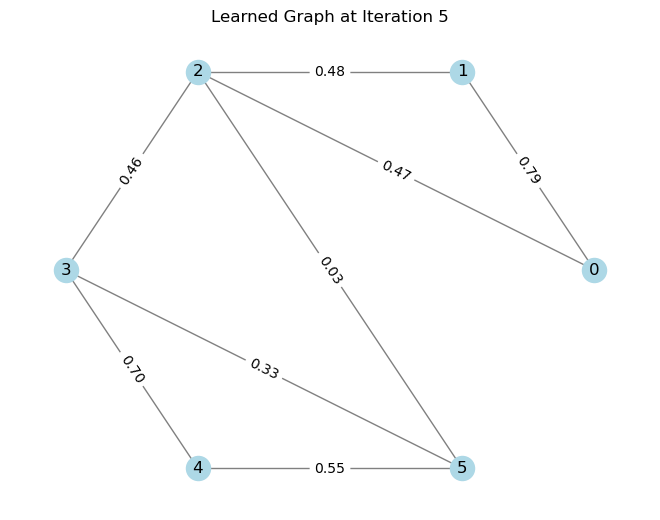

Final learned mask:
tensor([[0.0000, 0.3248, 0.3433, 0.0000, 0.0000, 0.0000],
        [0.3248, 0.0000, 0.3275, 0.0000, 0.0000, 0.0000],
        [0.3433, 0.3275, 0.0000, 0.2815, 0.0000, 0.0177],
        [0.0000, 0.0000, 0.2815, 0.0000, 0.3323, 0.1833],
        [0.0000, 0.0000, 0.0000, 0.3323, 0.0000, 0.3747],
        [0.0000, 0.0000, 0.0177, 0.1833, 0.3747, 0.0000]],
       grad_fn=<CopySlices>) tensor(1.3892, grad_fn=<PowBackward0>) tensor([[0.0553, 0.3801, 0.3987, 0.0553, 0.0553, 0.0553],
        [0.3827, 0.0580, 0.3855, 0.0580, 0.0580, 0.0580],
        [0.3483, 0.3325, 0.0050, 0.2865, 0.0050, 0.0227],
        [0.0338, 0.0338, 0.3153, 0.0338, 0.3661, 0.2171],
        [0.0488, 0.0488, 0.0488, 0.3811, 0.0488, 0.4235],
        [0.0707, 0.0707, 0.0884, 0.2540, 0.4454, 0.0707]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.7885, 0.4652, 0.0000, 0.0000, 0.0000],
        [0.7885, 0.0000, 0.4761, 0.0000, 0.0000, 0.0000],
        [0.4652, 0.476

In [4]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1612, GLR 7.1574, adj norm^2 5.4349
after M-step-1: delta_W norm 0.4211, GLR 7.7510, adj norm^2 5.7867
PGD iter 1/50, ||S_new - S||_F = 0.0278
PGD iter 21/50, ||S_new - S||_F = 0.0268
PGD iter 41/50, ||S_new - S||_F = 0.0256
tensor([[0.0000, 0.8391, 0.8172, 0.7344, 0.7067, 0.7605],
        [0.8391, 0.0000, 0.8395, 0.7296, 0.6830, 0.6668],
        [0.8172, 0.8395, 0.0000, 0.7906, 0.7545, 0.6846],
        [0.7344, 0.7296, 0.7906, 0.0000, 0.8385, 0.8143],
        [0.7067, 0.6830, 0.7545, 0.8385, 0.0000, 0.8277],
        [0.7605, 0.6668, 0.6846, 0.8143, 0.8277, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.9609, grad_fn=<PowBackward0>)


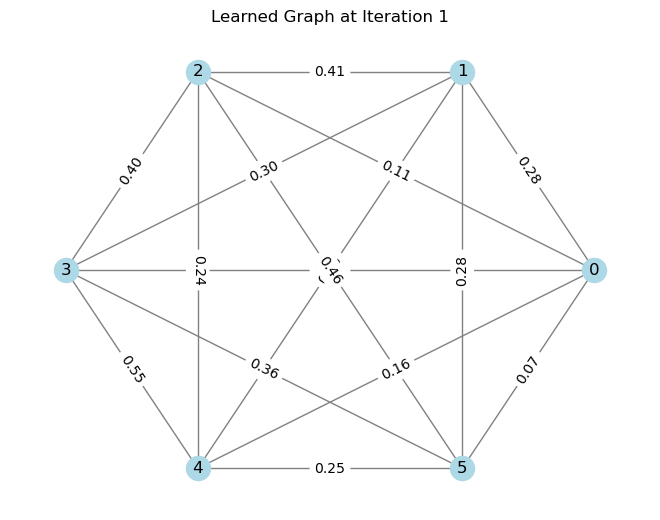

Iteration 2/5
after E-step: delta_W norm 0.4410, GLR 6.9160, adj norm^2 5.4178
after M-step-1: delta_W norm 0.2984, GLR 7.2930, adj norm^2 5.4396
PGD iter 1/50, ||S_new - S||_F = 0.0325
PGD iter 21/50, ||S_new - S||_F = 0.0313
PGD iter 41/50, ||S_new - S||_F = 0.0298
tensor([[0.0000, 0.8385, 0.8153, 0.7163, 0.6766, 0.7645],
        [0.8385, 0.0000, 0.8120, 0.6669, 0.6119, 0.5489],
        [0.8153, 0.8120, 0.0000, 0.7622, 0.7280, 0.6074],
        [0.7163, 0.6669, 0.7622, 0.0000, 0.8167, 0.7945],
        [0.6766, 0.6119, 0.7280, 0.8167, 0.0000, 0.8171],
        [0.7645, 0.5489, 0.6074, 0.7945, 0.8171, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(4.4722, grad_fn=<PowBackward0>)


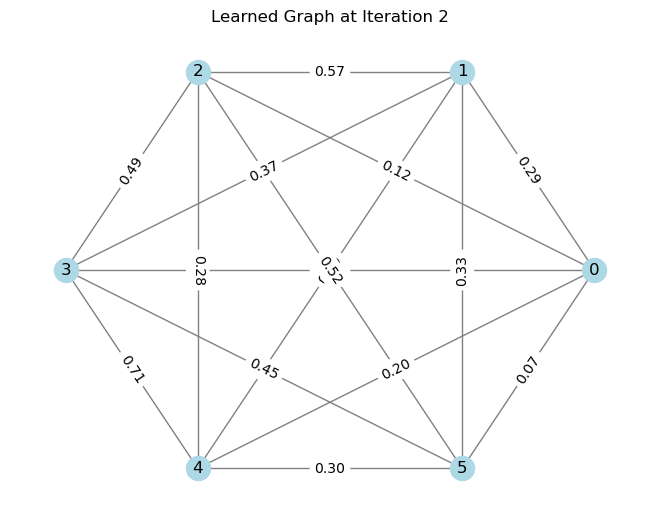

Iteration 3/5
after E-step: delta_W norm 0.3079, GLR 6.8791, adj norm^2 5.3952
after M-step-1: delta_W norm 0.2956, GLR 7.1777, adj norm^2 5.4882
PGD iter 1/50, ||S_new - S||_F = 0.0338
PGD iter 21/50, ||S_new - S||_F = 0.0326
PGD iter 41/50, ||S_new - S||_F = 0.0310
tensor([[0.0000, 0.8368, 0.8147, 0.7176, 0.6870, 0.7634],
        [0.8368, 0.0000, 0.8091, 0.6513, 0.5793, 0.5289],
        [0.8147, 0.8091, 0.0000, 0.7514, 0.7101, 0.5771],
        [0.7176, 0.6513, 0.7514, 0.0000, 0.8105, 0.7864],
        [0.6870, 0.5793, 0.7101, 0.8105, 0.0000, 0.8122],
        [0.7634, 0.5289, 0.5771, 0.7864, 0.8122, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.8322, grad_fn=<PowBackward0>)


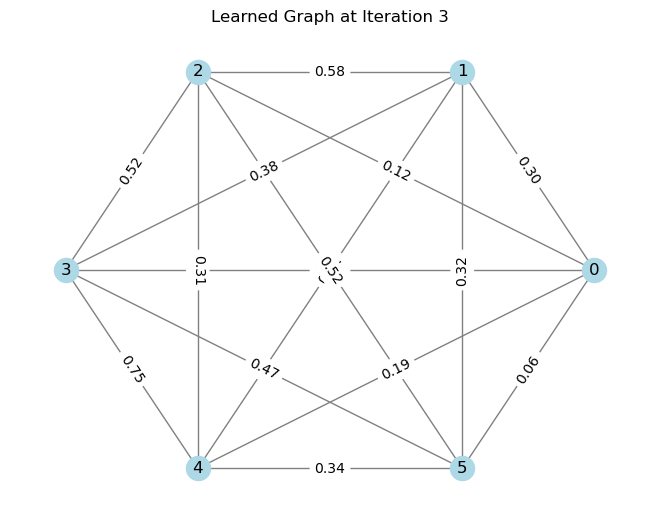

Iteration 4/5
after E-step: delta_W norm 0.2982, GLR 6.8891, adj norm^2 5.3905
after M-step-1: delta_W norm 0.2261, GLR 7.0978, adj norm^2 5.4469
PGD iter 1/50, ||S_new - S||_F = 0.0343
PGD iter 21/50, ||S_new - S||_F = 0.0330
PGD iter 41/50, ||S_new - S||_F = 0.0314
tensor([[0.0000, 0.8394, 0.8153, 0.7249, 0.6976, 0.7690],
        [0.8394, 0.0000, 0.8063, 0.6447, 0.5694, 0.5103],
        [0.8153, 0.8063, 0.0000, 0.7485, 0.7070, 0.5636],
        [0.7249, 0.6447, 0.7485, 0.0000, 0.8097, 0.7848],
        [0.6976, 0.5694, 0.7070, 0.8097, 0.0000, 0.8120],
        [0.7690, 0.5103, 0.5636, 0.7848, 0.8120, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.9343, grad_fn=<PowBackward0>)


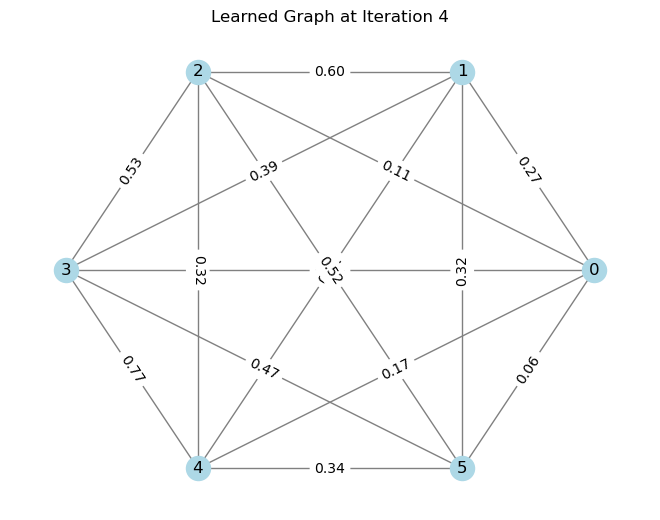

Iteration 5/5
after E-step: delta_W norm 0.2265, GLR 6.9041, adj norm^2 5.3899
after M-step-1: delta_W norm 0.1992, GLR 7.0657, adj norm^2 5.4175
PGD iter 1/50, ||S_new - S||_F = 0.0345
PGD iter 21/50, ||S_new - S||_F = 0.0332
PGD iter 41/50, ||S_new - S||_F = 0.0315
tensor([[0.0000, 0.8392, 0.8150, 0.7270, 0.7033, 0.7712],
        [0.8392, 0.0000, 0.8054, 0.6409, 0.5662, 0.5048],
        [0.8150, 0.8054, 0.0000, 0.7467, 0.7062, 0.5578],
        [0.7270, 0.6409, 0.7467, 0.0000, 0.8099, 0.7838],
        [0.7033, 0.5662, 0.7062, 0.8099, 0.0000, 0.8117],
        [0.7712, 0.5048, 0.5578, 0.7838, 0.8117, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.9739, grad_fn=<PowBackward0>)


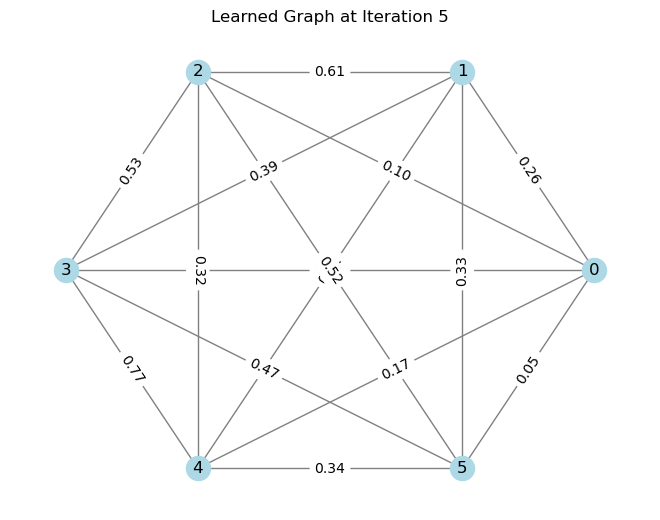

Final learned mask:
tensor([[0.0000, 0.8392, 0.8150, 0.7270, 0.7033, 0.7712],
        [0.8392, 0.0000, 0.8054, 0.6409, 0.5662, 0.5048],
        [0.8150, 0.8054, 0.0000, 0.7467, 0.7062, 0.5578],
        [0.7270, 0.6409, 0.7467, 0.0000, 0.8099, 0.7838],
        [0.7033, 0.5662, 0.7062, 0.8099, 0.0000, 0.8117],
        [0.7712, 0.5048, 0.5578, 0.7838, 0.8117, 0.0000]],
       grad_fn=<CopySlices>) tensor(15.8359, grad_fn=<PowBackward0>) tensor([[0.0000, 0.2680, 0.2439, 0.1559, 0.1322, 0.2001],
        [0.3679, 0.0000, 0.3341, 0.1696, 0.0949, 0.0335],
        [0.2888, 0.2792, 0.0000, 0.2204, 0.1800, 0.0316],
        [0.1854, 0.0993, 0.2050, 0.0000, 0.2682, 0.2422],
        [0.1838, 0.0467, 0.1868, 0.2904, 0.0000, 0.2923],
        [0.2853, 0.0189, 0.0720, 0.2980, 0.3258, 0.0000]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.2563, 0.0997, 0.2330, 0.1659, 0.0511],
        [0.2563, 0.0000, 0.6134, 0.3937, 0.3164, 0.3254],
        [0.0997, 0.61

In [5]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.01
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1612, GLR 7.1574, adj norm^2 5.4349
after M-step-1: delta_W norm 0.4211, GLR 7.7510, adj norm^2 5.7867
PGD iter 1/100, ||S_new - S||_F = 0.0555
PGD iter 21/100, ||S_new - S||_F = 0.0513
PGD iter 41/100, ||S_new - S||_F = 0.0452
PGD iter 61/100, ||S_new - S||_F = 0.0365
PGD iter 81/100, ||S_new - S||_F = 0.0253
tensor([[0.0000, 0.6039, 0.3936, 0.2097, 0.0871, 0.1574],
        [0.6039, 0.0000, 0.6082, 0.2047, 0.0607, 0.0601],
        [0.3936, 0.6082, 0.0000, 0.4060, 0.2294, 0.2178],
        [0.2097, 0.2047, 0.4060, 0.0000, 0.6017, 0.4930],
        [0.0871, 0.0607, 0.2294, 0.6017, 0.0000, 0.5060],
        [0.1574, 0.0601, 0.2178, 0.4930, 0.5060, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.8753, grad_fn=<PowBackward0>)


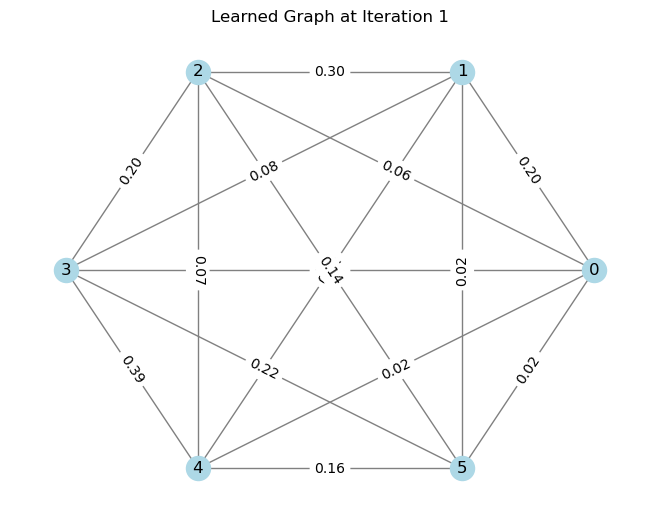

Iteration 2/5
after E-step: delta_W norm 0.4847, GLR 5.0100, adj norm^2 5.1213
after M-step-1: delta_W norm 0.8496, GLR 5.5215, adj norm^2 5.6745
PGD iter 1/100, ||S_new - S||_F = 0.1191
PGD iter 21/100, ||S_new - S||_F = 0.1075
PGD iter 41/100, ||S_new - S||_F = 0.0484
PGD iter 61/100, ||S_new - S||_F = 0.0160
PGD iter 81/100, ||S_new - S||_F = 0.0092
tensor([[0.0000, 0.4705, 0.4040, 0.0314, 0.0000, 0.0000],
        [0.4705, 0.0000, 0.4949, 0.0022, 0.0000, 0.0000],
        [0.4040, 0.4949, 0.0000, 0.3746, 0.0054, 0.0762],
        [0.0314, 0.0022, 0.3746, 0.0000, 0.4683, 0.3542],
        [0.0000, 0.0000, 0.0054, 0.4683, 0.0000, 0.4639],
        [0.0000, 0.0000, 0.0762, 0.3542, 0.4639, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.0478, grad_fn=<PowBackward0>)


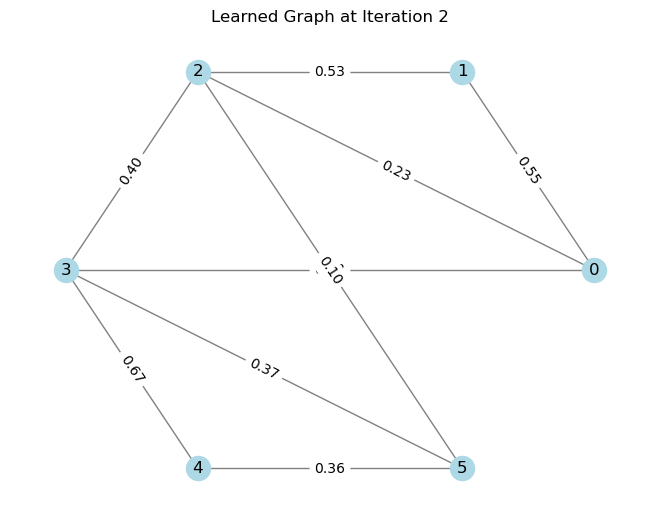

Iteration 3/5
after E-step: delta_W norm 0.8637, GLR 3.5688, adj norm^2 4.8602
after M-step-1: delta_W norm 1.1820, GLR 3.8583, adj norm^2 5.9127
PGD iter 1/100, ||S_new - S||_F = 0.1603
PGD iter 21/100, ||S_new - S||_F = 0.1395
PGD iter 41/100, ||S_new - S||_F = 0.0296
PGD iter 61/100, ||S_new - S||_F = 0.0141
PGD iter 81/100, ||S_new - S||_F = 0.0064
tensor([[0.0000, 0.3780, 0.3820, 0.0000, 0.0000, 0.0000],
        [0.3780, 0.0000, 0.4231, 0.0000, 0.0000, 0.0000],
        [0.3820, 0.4231, 0.0000, 0.3342, 0.0000, 0.0361],
        [0.0000, 0.0000, 0.3342, 0.0000, 0.4074, 0.2540],
        [0.0000, 0.0000, 0.0000, 0.4074, 0.0000, 0.4197],
        [0.0000, 0.0000, 0.0361, 0.2540, 0.4197, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.5579, grad_fn=<PowBackward0>)


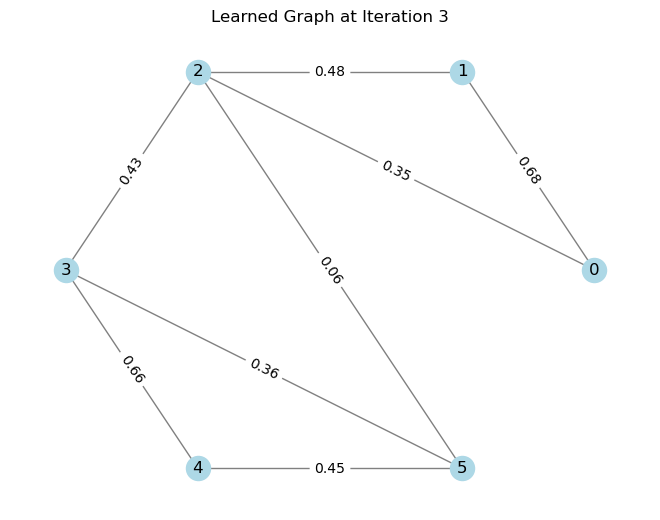

Iteration 4/5
after E-step: delta_W norm 1.1693, GLR 3.3897, adj norm^2 4.8057
after M-step-1: delta_W norm 1.2307, GLR 3.6617, adj norm^2 6.0380
PGD iter 1/100, ||S_new - S||_F = 0.1806
PGD iter 21/100, ||S_new - S||_F = 0.1318
PGD iter 41/100, ||S_new - S||_F = 0.0265
PGD iter 61/100, ||S_new - S||_F = 0.0120
PGD iter 81/100, ||S_new - S||_F = 0.0051
tensor([[0.0000, 0.3486, 0.3588, 0.0000, 0.0000, 0.0000],
        [0.3486, 0.0000, 0.3656, 0.0000, 0.0000, 0.0000],
        [0.3588, 0.3656, 0.0000, 0.3027, 0.0000, 0.0228],
        [0.0000, 0.0000, 0.3027, 0.0000, 0.3625, 0.2070],
        [0.0000, 0.0000, 0.0000, 0.3625, 0.0000, 0.3882],
        [0.0000, 0.0000, 0.0228, 0.2070, 0.3882, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.0540, grad_fn=<PowBackward0>)


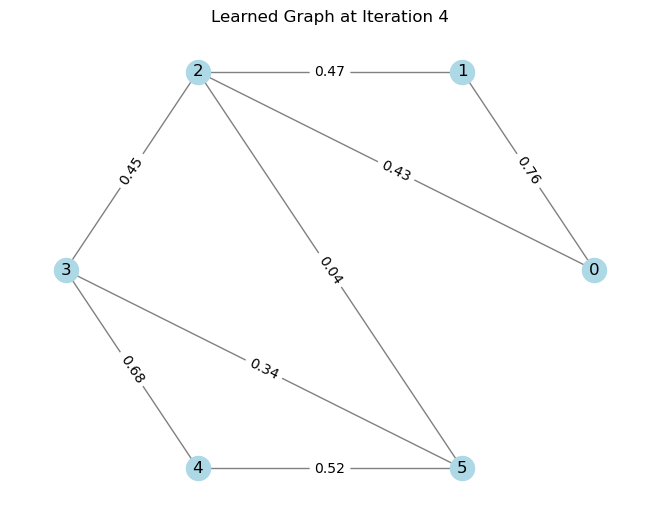

Iteration 5/5
after E-step: delta_W norm 1.2614, GLR 3.3744, adj norm^2 4.7832
after M-step-1: delta_W norm 1.2652, GLR 3.5906, adj norm^2 6.0134
PGD iter 1/100, ||S_new - S||_F = 0.1976
PGD iter 21/100, ||S_new - S||_F = 0.1248
PGD iter 41/100, ||S_new - S||_F = 0.0270
PGD iter 61/100, ||S_new - S||_F = 0.0111
PGD iter 81/100, ||S_new - S||_F = 0.0044
tensor([[0.0000, 0.3265, 0.3459, 0.0000, 0.0000, 0.0000],
        [0.3265, 0.0000, 0.3301, 0.0000, 0.0000, 0.0000],
        [0.3459, 0.3301, 0.0000, 0.2831, 0.0000, 0.0177],
        [0.0000, 0.0000, 0.2831, 0.0000, 0.3339, 0.1844],
        [0.0000, 0.0000, 0.0000, 0.3339, 0.0000, 0.3769],
        [0.0000, 0.0000, 0.0177, 0.1844, 0.3769, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.3593, grad_fn=<PowBackward0>)


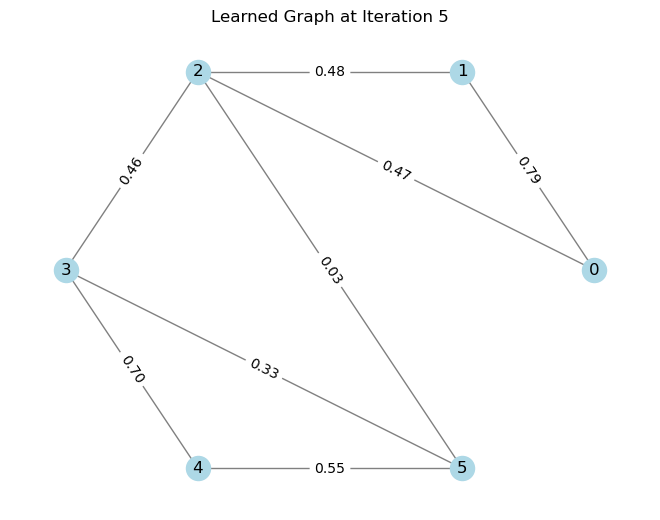

Final learned mask:
tensor([[0.0000, 0.3265, 0.3459, 0.0000, 0.0000, 0.0000],
        [0.3265, 0.0000, 0.3301, 0.0000, 0.0000, 0.0000],
        [0.3459, 0.3301, 0.0000, 0.2831, 0.0000, 0.0177],
        [0.0000, 0.0000, 0.2831, 0.0000, 0.3339, 0.1844],
        [0.0000, 0.0000, 0.0000, 0.3339, 0.0000, 0.3769],
        [0.0000, 0.0000, 0.0177, 0.1844, 0.3769, 0.0000]],
       grad_fn=<CopySlices>) tensor(1.4063, grad_fn=<PowBackward0>) tensor([[0.0546, 0.3811, 0.4005, 0.0546, 0.0546, 0.0546],
        [0.3837, 0.0572, 0.3874, 0.0572, 0.0572, 0.0572],
        [0.3497, 0.3340, 0.0039, 0.2870, 0.0039, 0.0215],
        [0.0331, 0.0331, 0.3162, 0.0331, 0.3670, 0.2175],
        [0.0482, 0.0482, 0.0482, 0.3821, 0.0482, 0.4251],
        [0.0702, 0.0702, 0.0878, 0.2546, 0.4470, 0.0702]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.7877, 0.4660, 0.0000, 0.0000, 0.0000],
        [0.7877, 0.0000, 0.4767, 0.0000, 0.0000, 0.0000],
        [0.4660, 0.476

In [6]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1612, GLR 7.1574, adj norm^2 5.4349
after M-step-1: delta_W norm 0.4211, GLR 7.7510, adj norm^2 5.7867
PGD iter 1/100, ||S_new - S||_F = 0.1110
PGD iter 21/100, ||S_new - S||_F = 0.0903
PGD iter 41/100, ||S_new - S||_F = 0.0501
PGD iter 61/100, ||S_new - S||_F = 0.0204
PGD iter 81/100, ||S_new - S||_F = 0.0104
tensor([[0.0000, 0.6744, 0.1024, 0.2191, 0.0114, 0.0000],
        [0.6744, 0.0000, 0.6527, 0.1388, 0.0644, 0.0408],
        [0.1024, 0.6527, 0.0000, 0.3536, 0.0271, 0.2957],
        [0.2191, 0.1388, 0.3536, 0.0000, 0.6358, 0.4144],
        [0.0114, 0.0644, 0.0271, 0.6358, 0.0000, 0.4138],
        [0.0000, 0.0408, 0.2957, 0.4144, 0.4138, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.9041, grad_fn=<PowBackward0>)


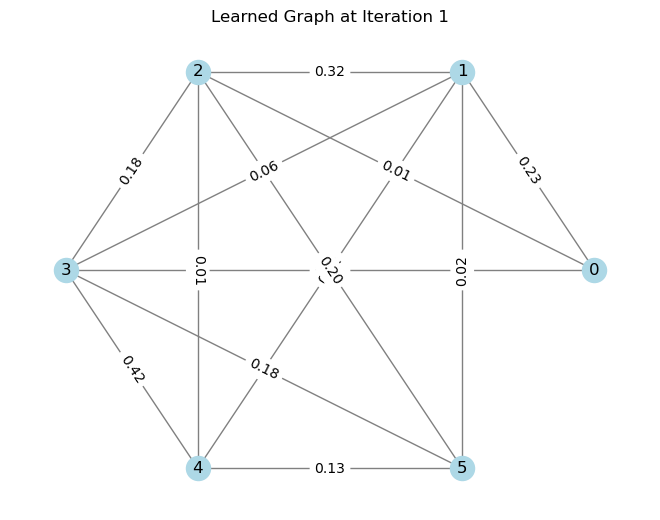

Iteration 2/5
after E-step: delta_W norm 0.5019, GLR 4.5938, adj norm^2 5.0614
after M-step-1: delta_W norm 0.9664, GLR 4.7580, adj norm^2 5.8489
PGD iter 1/100, ||S_new - S||_F = 0.2412
PGD iter 21/100, ||S_new - S||_F = 0.0872
PGD iter 41/100, ||S_new - S||_F = 0.0175
PGD iter 61/100, ||S_new - S||_F = 0.0064
PGD iter 81/100, ||S_new - S||_F = 0.0037
tensor([[0.0000, 0.4549, 0.2495, 0.0606, 0.0000, 0.0000],
        [0.4549, 0.0000, 0.5037, 0.0000, 0.0000, 0.0000],
        [0.2495, 0.5037, 0.0000, 0.3336, 0.0000, 0.1070],
        [0.0606, 0.0000, 0.3336, 0.0000, 0.4636, 0.2737],
        [0.0000, 0.0000, 0.0000, 0.4636, 0.0000, 0.3917],
        [0.0000, 0.0000, 0.1070, 0.2737, 0.3917, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.6415, grad_fn=<PowBackward0>)


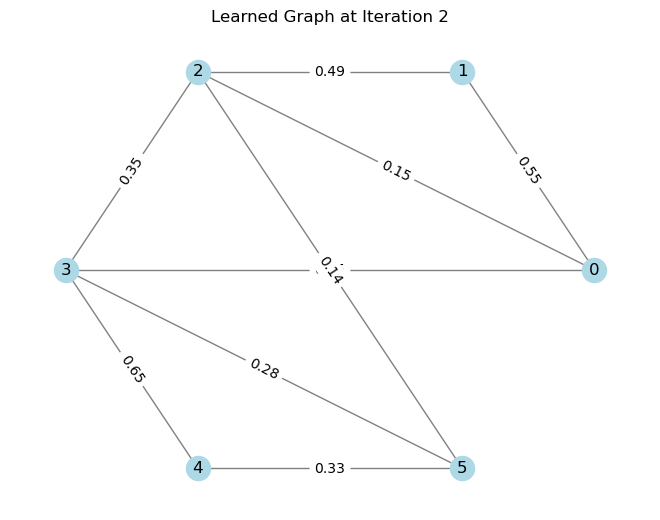

Iteration 3/5
after E-step: delta_W norm 0.9384, GLR 3.6285, adj norm^2 4.8712
after M-step-1: delta_W norm 1.1542, GLR 3.9268, adj norm^2 6.0108
PGD iter 1/100, ||S_new - S||_F = 0.3359
PGD iter 21/100, ||S_new - S||_F = 0.0513
PGD iter 41/100, ||S_new - S||_F = 0.0115
PGD iter 61/100, ||S_new - S||_F = 0.0027
PGD iter 81/100, ||S_new - S||_F = 0.0012
tensor([[0.0000, 0.3756, 0.3028, 0.0072, 0.0000, 0.0000],
        [0.3756, 0.0000, 0.4003, 0.0000, 0.0000, 0.0000],
        [0.3028, 0.4003, 0.0000, 0.3004, 0.0000, 0.0438],
        [0.0072, 0.0000, 0.3004, 0.0000, 0.3882, 0.2200],
        [0.0000, 0.0000, 0.0000, 0.3882, 0.0000, 0.3674],
        [0.0000, 0.0000, 0.0438, 0.2200, 0.3674, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.5781, grad_fn=<PowBackward0>)


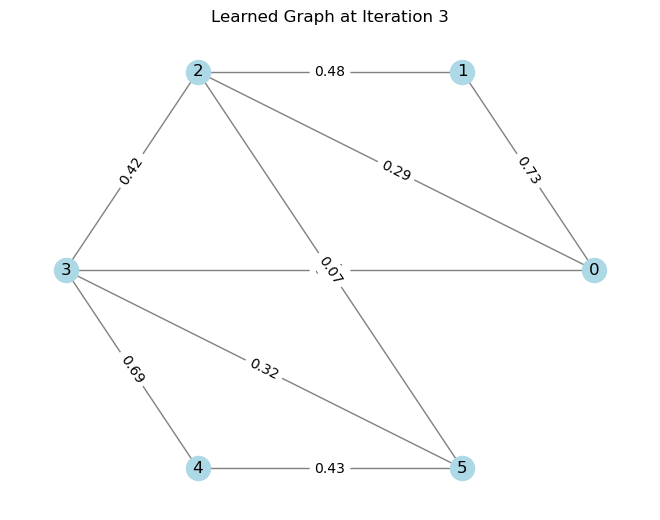

Iteration 4/5
after E-step: delta_W norm 1.1739, GLR 3.4183, adj norm^2 4.8112
after M-step-1: delta_W norm 1.2526, GLR 3.6592, adj norm^2 6.0526
PGD iter 1/100, ||S_new - S||_F = 0.3848
PGD iter 21/100, ||S_new - S||_F = 0.0531
PGD iter 41/100, ||S_new - S||_F = 0.0087
PGD iter 61/100, ||S_new - S||_F = 0.0016
PGD iter 81/100, ||S_new - S||_F = 0.0004
tensor([[0.0000, 0.3415, 0.3071, 0.0000, 0.0000, 0.0000],
        [0.3415, 0.0000, 0.3409, 0.0000, 0.0000, 0.0000],
        [0.3071, 0.3409, 0.0000, 0.2837, 0.0000, 0.0242],
        [0.0000, 0.0000, 0.2837, 0.0000, 0.3459, 0.1951],
        [0.0000, 0.0000, 0.0000, 0.3459, 0.0000, 0.3447],
        [0.0000, 0.0000, 0.0242, 0.1951, 0.3447, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.1342, grad_fn=<PowBackward0>)


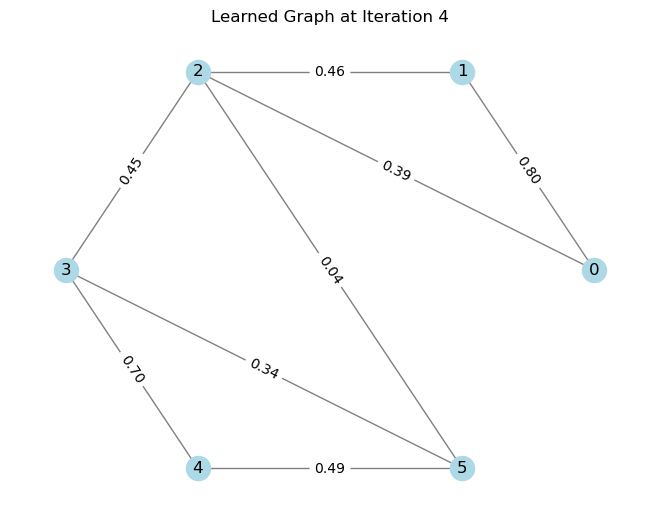

Iteration 5/5
after E-step: delta_W norm 1.2744, GLR 3.3869, adj norm^2 4.7858
after M-step-1: delta_W norm 1.2724, GLR 3.5809, adj norm^2 6.0553
PGD iter 1/100, ||S_new - S||_F = 0.4195
PGD iter 21/100, ||S_new - S||_F = 0.0519
PGD iter 41/100, ||S_new - S||_F = 0.0074
PGD iter 61/100, ||S_new - S||_F = 0.0013
PGD iter 81/100, ||S_new - S||_F = 0.0003
tensor([[0.0000, 0.3219, 0.3060, 0.0000, 0.0000, 0.0000],
        [0.3219, 0.0000, 0.3072, 0.0000, 0.0000, 0.0000],
        [0.3060, 0.3072, 0.0000, 0.2689, 0.0000, 0.0166],
        [0.0000, 0.0000, 0.2689, 0.0000, 0.3211, 0.1835],
        [0.0000, 0.0000, 0.0000, 0.3211, 0.0000, 0.3365],
        [0.0000, 0.0000, 0.0166, 0.1835, 0.3365, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.4475, grad_fn=<PowBackward0>)


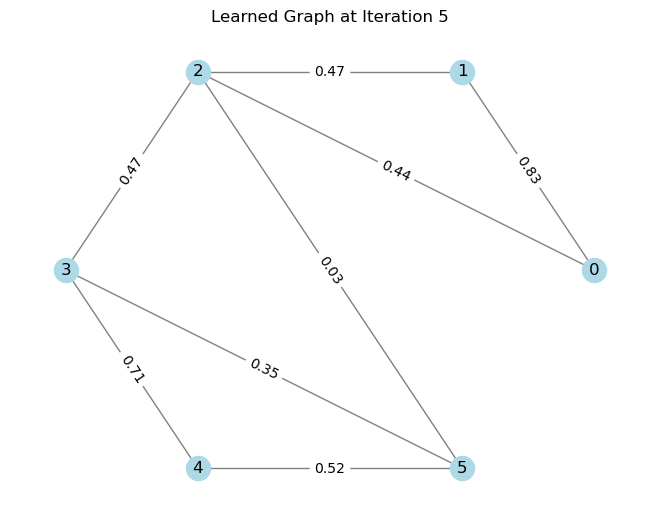

Final learned mask:
tensor([[0.0000, 0.3219, 0.3060, 0.0000, 0.0000, 0.0000],
        [0.3219, 0.0000, 0.3072, 0.0000, 0.0000, 0.0000],
        [0.3060, 0.3072, 0.0000, 0.2689, 0.0000, 0.0166],
        [0.0000, 0.0000, 0.2689, 0.0000, 0.3211, 0.1835],
        [0.0000, 0.0000, 0.0000, 0.3211, 0.0000, 0.3365],
        [0.0000, 0.0000, 0.0166, 0.1835, 0.3365, 0.0000]],
       grad_fn=<CopySlices>) tensor(1.2283, grad_fn=<PowBackward0>) tensor([[0.0620, 0.3839, 0.3680, 0.0620, 0.0620, 0.0620],
        [0.3837, 0.0618, 0.3690, 0.0618, 0.0618, 0.0618],
        [0.3229, 0.3241, 0.0169, 0.2858, 0.0169, 0.0335],
        [0.0377, 0.0377, 0.3066, 0.0377, 0.3589, 0.2213],
        [0.0571, 0.0571, 0.0571, 0.3782, 0.0571, 0.3935],
        [0.0772, 0.0772, 0.0938, 0.2608, 0.4137, 0.0772]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.8301, 0.4376, 0.0000, 0.0000, 0.0000],
        [0.8301, 0.0000, 0.4712, 0.0000, 0.0000, 0.0000],
        [0.4376, 0.471

In [7]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1612, GLR 7.1574, adj norm^2 5.4349
after M-step-1: delta_W norm 0.4211, GLR 7.7510, adj norm^2 5.7867
PGD iter 1/50, ||S_new - S||_F = 0.0986
PGD iter 21/50, ||S_new - S||_F = 0.0891
PGD iter 41/50, ||S_new - S||_F = 0.0673
tensor([[0.0000, 0.4196, 0.3028, 0.2032, 0.1361, 0.1767],
        [0.4196, 0.0000, 0.4195, 0.1949, 0.1127, 0.1048],
        [0.3028, 0.4195, 0.0000, 0.3154, 0.2173, 0.1937],
        [0.2032, 0.1949, 0.3154, 0.0000, 0.4300, 0.3598],
        [0.1361, 0.1127, 0.2173, 0.4300, 0.0000, 0.3623],
        [0.1767, 0.1048, 0.1937, 0.3598, 0.3623, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.4815, grad_fn=<PowBackward0>)


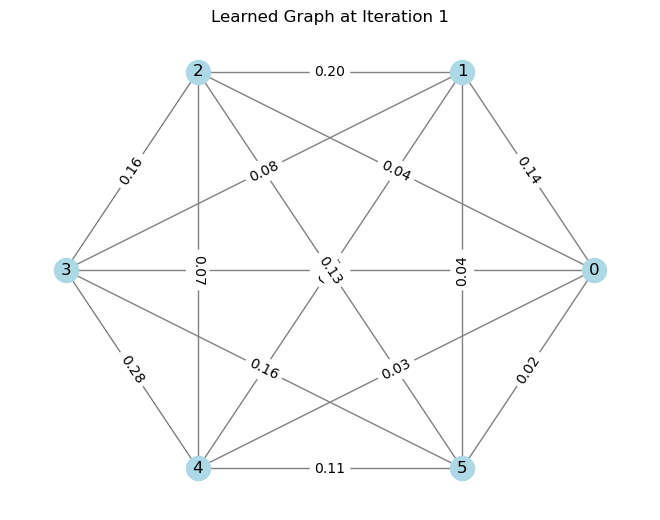

Iteration 2/5
after E-step: delta_W norm 0.4692, GLR 5.7585, adj norm^2 5.2258
after M-step-1: delta_W norm 0.6178, GLR 6.2525, adj norm^2 5.4629
PGD iter 1/50, ||S_new - S||_F = 0.1857
PGD iter 21/50, ||S_new - S||_F = 0.1379
PGD iter 41/50, ||S_new - S||_F = 0.0332
tensor([[0.0000, 0.3353, 0.2839, 0.0207, 0.0000, 0.0000],
        [0.3353, 0.0000, 0.3209, 0.0065, 0.0000, 0.0028],
        [0.2839, 0.3209, 0.0000, 0.2387, 0.0076, 0.0572],
        [0.0207, 0.0065, 0.2387, 0.0000, 0.2957, 0.2303],
        [0.0000, 0.0000, 0.0076, 0.2957, 0.0000, 0.3131],
        [0.0000, 0.0028, 0.0572, 0.2303, 0.3131, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.3862, grad_fn=<PowBackward0>)


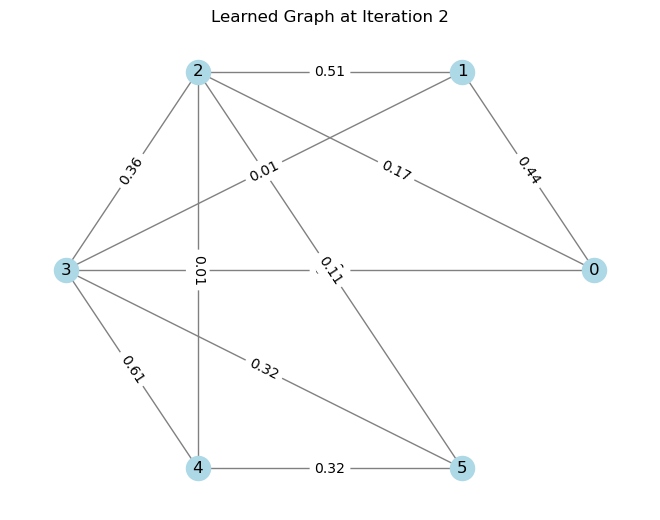

Iteration 3/5
after E-step: delta_W norm 0.6859, GLR 3.6892, adj norm^2 4.8830
after M-step-1: delta_W norm 1.1908, GLR 3.9269, adj norm^2 5.8322
PGD iter 1/50, ||S_new - S||_F = 0.2693
PGD iter 21/50, ||S_new - S||_F = 0.0921
PGD iter 41/50, ||S_new - S||_F = 0.0202
tensor([[0.0000e+00, 2.1489e-01, 2.2732e-01, 5.0599e-05, 0.0000e+00, 0.0000e+00],
        [2.1489e-01, 0.0000e+00, 2.5755e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.2732e-01, 2.5755e-01, 0.0000e+00, 1.9566e-01, 0.0000e+00, 3.2876e-02],
        [5.0595e-05, 0.0000e+00, 1.9566e-01, 0.0000e+00, 2.4149e-01, 1.3790e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4149e-01, 0.0000e+00, 2.6202e-01],
        [0.0000e+00, 0.0000e+00, 3.2876e-02, 1.3790e-01, 2.6202e-01, 0.0000e+00]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(2.7707, grad_fn=<PowBackward0>)


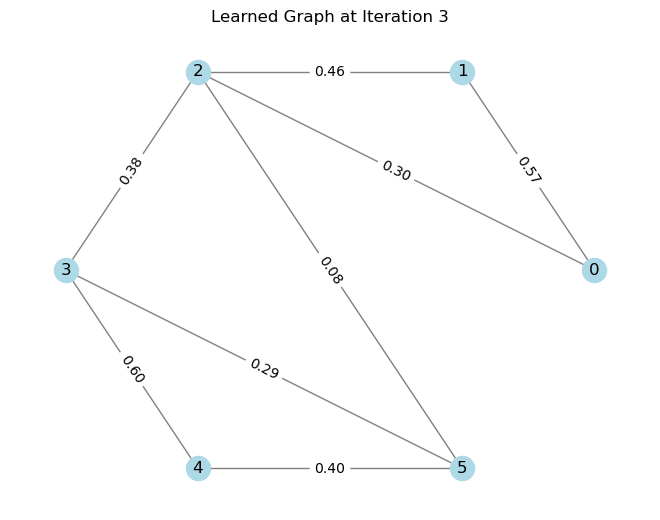

Iteration 4/5
after E-step: delta_W norm 1.0901, GLR 3.4456, adj norm^2 4.8237
after M-step-1: delta_W norm 1.2223, GLR 3.7426, adj norm^2 5.9959
PGD iter 1/50, ||S_new - S||_F = 0.3271
PGD iter 21/50, ||S_new - S||_F = 0.0769
PGD iter 41/50, ||S_new - S||_F = 0.0124
tensor([[0.0000, 0.1864, 0.1898, 0.0000, 0.0000, 0.0000],
        [0.1864, 0.0000, 0.2047, 0.0000, 0.0000, 0.0000],
        [0.1898, 0.2047, 0.0000, 0.1630, 0.0000, 0.0212],
        [0.0000, 0.0000, 0.1630, 0.0000, 0.2024, 0.1026],
        [0.0000, 0.0000, 0.0000, 0.2024, 0.0000, 0.2162],
        [0.0000, 0.0000, 0.0212, 0.1026, 0.2162, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.4571, grad_fn=<PowBackward0>)


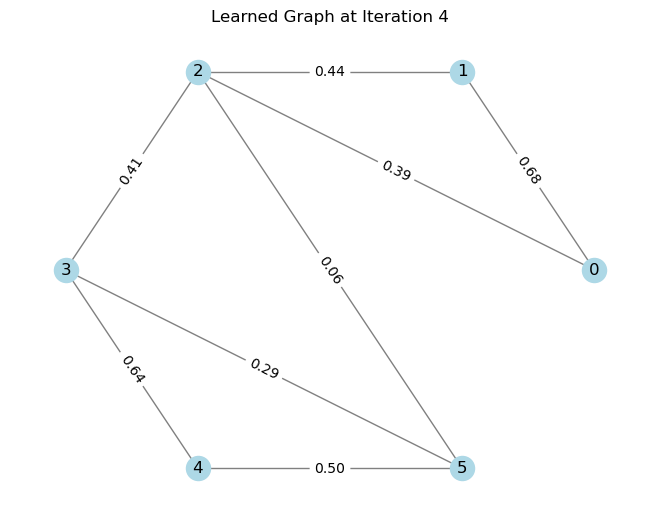

Iteration 5/5
after E-step: delta_W norm 1.2512, GLR 3.4194, adj norm^2 4.7954
after M-step-1: delta_W norm 1.2434, GLR 3.6463, adj norm^2 6.0040
PGD iter 1/50, ||S_new - S||_F = 0.3801
PGD iter 21/50, ||S_new - S||_F = 0.0764
PGD iter 41/50, ||S_new - S||_F = 0.0087
tensor([[0.0000, 0.1714, 0.1766, 0.0000, 0.0000, 0.0000],
        [0.1714, 0.0000, 0.1690, 0.0000, 0.0000, 0.0000],
        [0.1766, 0.1690, 0.0000, 0.1454, 0.0000, 0.0142],
        [0.0000, 0.0000, 0.1454, 0.0000, 0.1769, 0.0911],
        [0.0000, 0.0000, 0.0000, 0.1769, 0.0000, 0.1989],
        [0.0000, 0.0000, 0.0142, 0.0911, 0.1989, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.0019, grad_fn=<PowBackward0>)


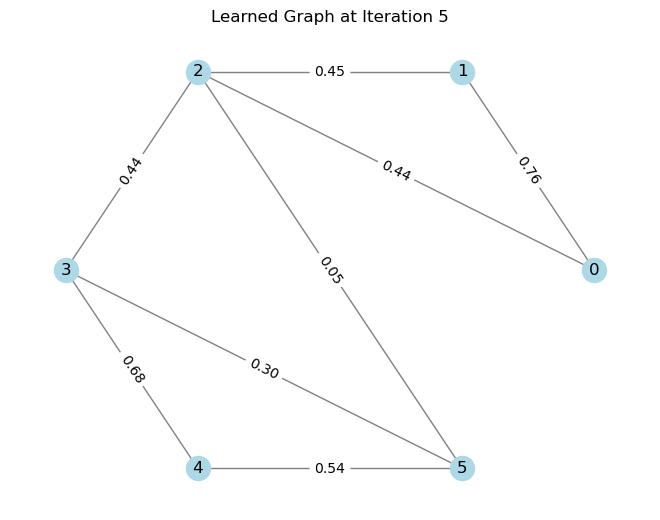

Final learned mask:
tensor([[0.0000, 0.1714, 0.1766, 0.0000, 0.0000, 0.0000],
        [0.1714, 0.0000, 0.1690, 0.0000, 0.0000, 0.0000],
        [0.1766, 0.1690, 0.0000, 0.1454, 0.0000, 0.0142],
        [0.0000, 0.0000, 0.1454, 0.0000, 0.1769, 0.0911],
        [0.0000, 0.0000, 0.0000, 0.1769, 0.0000, 0.1989],
        [0.0000, 0.0000, 0.0142, 0.0911, 0.1989, 0.0000]],
       grad_fn=<CopySlices>) tensor(0.3793, grad_fn=<PowBackward0>) tensor([[0.1087, 0.2801, 0.2853, 0.1087, 0.1087, 0.1087],
        [0.2813, 0.1099, 0.2789, 0.1099, 0.1099, 0.1099],
        [0.2591, 0.2515, 0.0825, 0.2278, 0.0825, 0.0967],
        [0.0978, 0.0978, 0.2431, 0.0978, 0.2747, 0.1889],
        [0.1040, 0.1040, 0.1040, 0.2810, 0.1040, 0.3029],
        [0.1160, 0.1160, 0.1302, 0.2071, 0.3149, 0.1160]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.7560, 0.4377, 0.0000, 0.0000, 0.0000],
        [0.7560, 0.0000, 0.4467, 0.0000, 0.0000, 0.0000],
        [0.4377, 0.446

In [8]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.8,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1612, GLR 7.1574, adj norm^2 5.4349
after M-step-1: delta_W norm 0.4211, GLR 7.7510, adj norm^2 5.7867
PGD iter 1/50, ||S_new - S||_F = 0.0694
PGD iter 21/50, ||S_new - S||_F = 0.0593
PGD iter 41/50, ||S_new - S||_F = 0.0451
tensor([[0.0000, 0.8289, 0.7051, 0.4188, 0.3058, 0.4777],
        [0.8289, 0.0000, 0.8363, 0.4101, 0.2391, 0.2057],
        [0.7051, 0.8363, 0.0000, 0.6359, 0.4830, 0.3182],
        [0.4188, 0.4101, 0.6359, 0.0000, 0.8214, 0.7329],
        [0.3058, 0.2391, 0.4830, 0.8214, 0.0000, 0.7729],
        [0.4777, 0.2057, 0.3182, 0.7329, 0.7729, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.8725, grad_fn=<PowBackward0>)


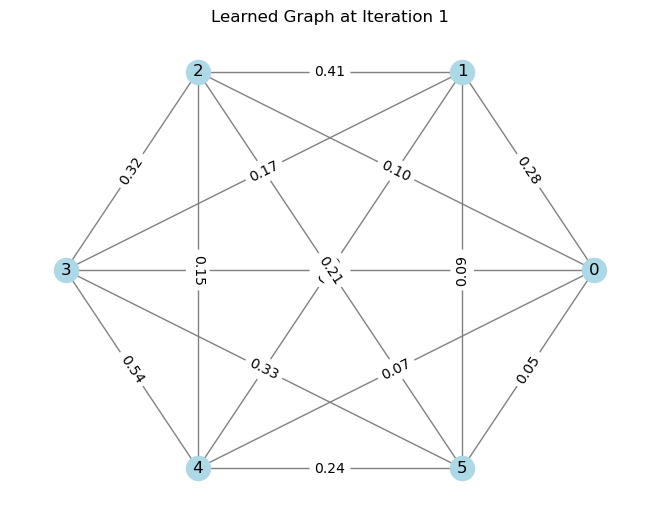

Iteration 2/5
after E-step: delta_W norm 0.4846, GLR 5.8237, adj norm^2 5.2213
after M-step-1: delta_W norm 0.5577, GLR 6.3658, adj norm^2 5.3709
PGD iter 1/50, ||S_new - S||_F = 0.1303
PGD iter 21/50, ||S_new - S||_F = 0.1036
PGD iter 41/50, ||S_new - S||_F = 0.0347
tensor([[0.0000, 0.8082, 0.7002, 0.1165, -0.0000, 0.3105],
        [0.8082, 0.0000, 0.7553, 0.0801, -0.0000, 0.0000],
        [0.7002, 0.7553, 0.0000, 0.4987, 0.2826, 0.0054],
        [0.1165, 0.0801, 0.4987, 0.0000, 0.7374, 0.6659],
        [-0.0000, -0.0000, 0.2826, 0.7374, 0.0000, 0.7633],
        [0.3105, 0.0000, 0.0054, 0.6659, 0.7633, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.6168, grad_fn=<PowBackward0>)


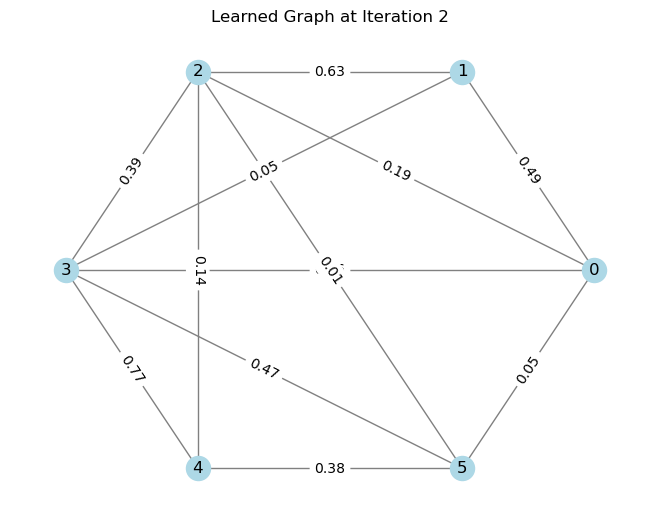

Iteration 3/5
after E-step: delta_W norm 0.5987, GLR 3.7465, adj norm^2 4.8931
after M-step-1: delta_W norm 1.1781, GLR 4.6127, adj norm^2 5.9083
PGD iter 1/50, ||S_new - S||_F = 0.1755
PGD iter 21/50, ||S_new - S||_F = 0.1154
PGD iter 41/50, ||S_new - S||_F = 0.0159
tensor([[0.0000, 0.6812, 0.6971, 0.0156, 0.0000, 0.0000],
        [0.6812, 0.0000, 0.7338, 0.0444, 0.0000, 0.0000],
        [0.6971, 0.7338, 0.0000, 0.4375, 0.1832, 0.0031],
        [0.0156, 0.0444, 0.4375, 0.0000, 0.7285, 0.5863],
        [0.0000, 0.0000, 0.1832, 0.7285, 0.0000, 0.7408],
        [0.0000, 0.0000, 0.0031, 0.5863, 0.7408, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.1754, grad_fn=<PowBackward0>)


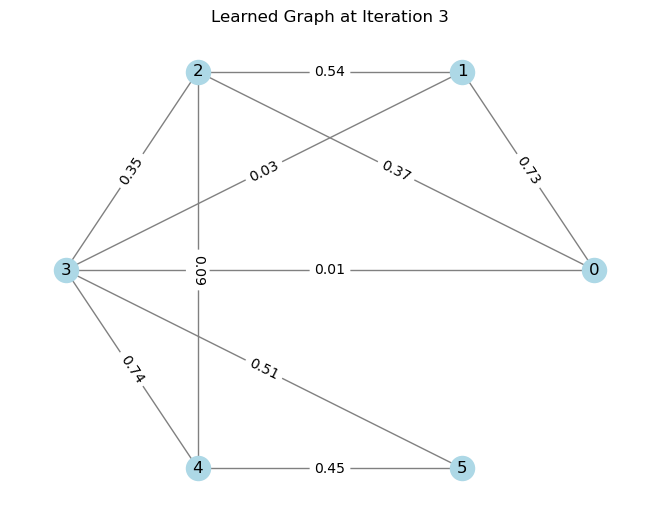

Iteration 4/5
after E-step: delta_W norm 1.1150, GLR 3.4186, adj norm^2 4.8054
after M-step-1: delta_W norm 1.2183, GLR 3.7084, adj norm^2 6.0257
PGD iter 1/50, ||S_new - S||_F = 0.1879
PGD iter 21/50, ||S_new - S||_F = 0.1108
PGD iter 41/50, ||S_new - S||_F = 0.0147
tensor([[0.0000, 0.6907, 0.6972, 0.0018, 0.0000, 0.0000],
        [0.6907, 0.0000, 0.7023, 0.0295, 0.0000, 0.0000],
        [0.6972, 0.7023, 0.0000, 0.4175, 0.1257, 0.0056],
        [0.0018, 0.0295, 0.4175, 0.0000, 0.6868, 0.5363],
        [0.0000, 0.0000, 0.1257, 0.6868, 0.0000, 0.7142],
        [0.0000, 0.0000, 0.0056, 0.5363, 0.7142, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.6807, grad_fn=<PowBackward0>)


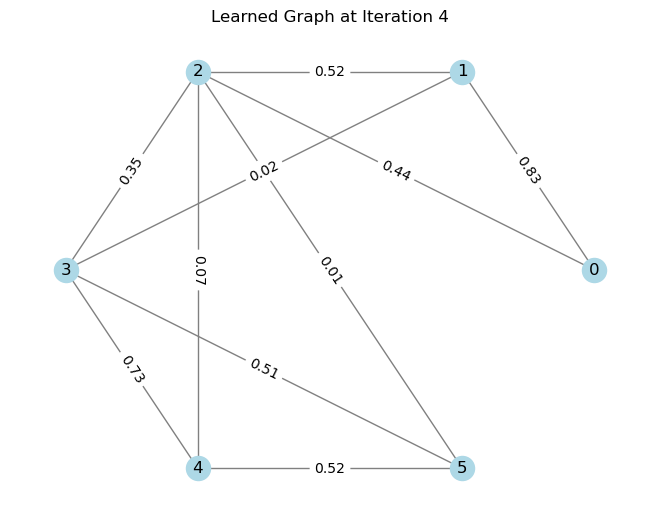

Iteration 5/5
after E-step: delta_W norm 1.2644, GLR 3.3726, adj norm^2 4.7751
after M-step-1: delta_W norm 1.2280, GLR 3.5919, adj norm^2 5.9658
PGD iter 1/50, ||S_new - S||_F = 0.1929
PGD iter 21/50, ||S_new - S||_F = 0.1117
PGD iter 41/50, ||S_new - S||_F = 0.0135
tensor([[0.0000, 0.6985, 0.7071, 0.0099, 0.0000, 0.0000],
        [0.6985, 0.0000, 0.6901, 0.0087, 0.0000, 0.0000],
        [0.7071, 0.6901, 0.0000, 0.4194, 0.0875, 0.0101],
        [0.0099, 0.0087, 0.4194, 0.0000, 0.6552, 0.5273],
        [0.0000, 0.0000, 0.0875, 0.6552, 0.0000, 0.7127],
        [0.0000, 0.0000, 0.0101, 0.5273, 0.7127, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.8934, grad_fn=<PowBackward0>)


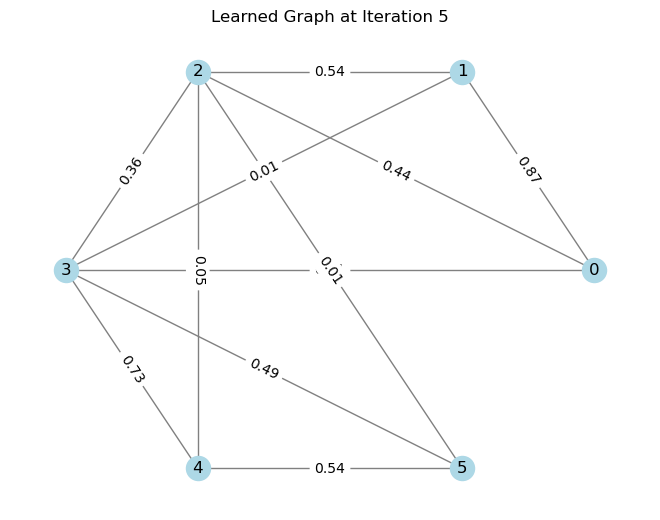

Final learned mask:
tensor([[0.0000, 0.6985, 0.7071, 0.0099, 0.0000, 0.0000],
        [0.6985, 0.0000, 0.6901, 0.0087, 0.0000, 0.0000],
        [0.7071, 0.6901, 0.0000, 0.4194, 0.0875, 0.0101],
        [0.0099, 0.0087, 0.4194, 0.0000, 0.6552, 0.5273],
        [0.0000, 0.0000, 0.0875, 0.6552, 0.0000, 0.7127],
        [0.0000, 0.0000, 0.0101, 0.5273, 0.7127, 0.0000]],
       grad_fn=<CopySlices>) tensor(5.7263, grad_fn=<PowBackward0>) tensor([[0.0000, 0.4957, 0.5043, 0.0000, 0.0000, 0.0000],
        [0.5042, 0.0000, 0.4958, 0.0000, 0.0000, 0.0000],
        [0.4349, 0.4179, 0.0000, 0.1472, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2188, 0.0000, 0.4546, 0.3266],
        [0.0000, 0.0000, 0.0000, 0.4712, 0.0000, 0.5288],
        [0.0000, 0.0000, 0.0000, 0.4073, 0.5927, 0.0000]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.8687, 0.4371, 0.0060, 0.0000, 0.0000],
        [0.8687, 0.0000, 0.5426, 0.0053, 0.0000, 0.0000],
        [0.4371, 0.542

In [9]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.2,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.0949, GLR 9.9822, adj norm^2 4.9682
after M-step-1: delta_W norm 0.2270, GLR 9.9246, adj norm^2 4.5346
PGD iter 1/50, ||S_new - S||_F = 0.0648
PGD iter 21/50, ||S_new - S||_F = 0.0594
PGD iter 41/50, ||S_new - S||_F = 0.0506
tensor([[0.0000, 0.7148, 0.6544, 0.5023, 0.4631, 0.5587],
        [0.7148, 0.0000, 0.6662, 0.3663, 0.3142, 0.1695],
        [0.6544, 0.6662, 0.0000, 0.5332, 0.4716, 0.2693],
        [0.5023, 0.3663, 0.5332, 0.0000, 0.6472, 0.6117],
        [0.4631, 0.3142, 0.4716, 0.6472, 0.0000, 0.6624],
        [0.5587, 0.1695, 0.2693, 0.6117, 0.6624, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.3702, grad_fn=<PowBackward0>)


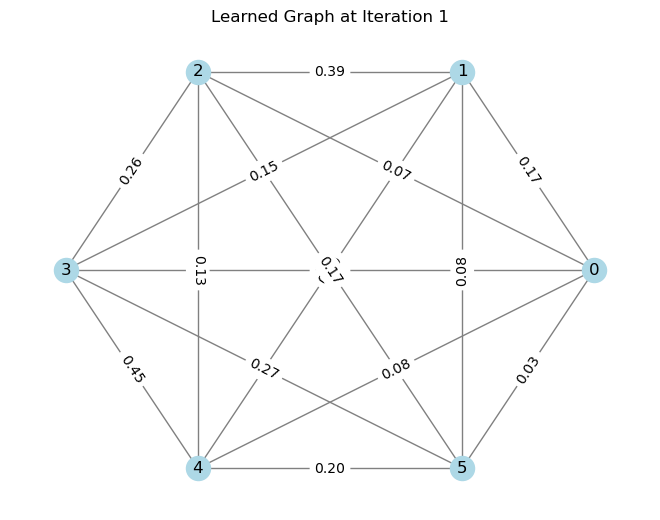

Iteration 2/5
after E-step: delta_W norm 0.2292, GLR 8.5104, adj norm^2 4.8411
after M-step-1: delta_W norm 0.1260, GLR 8.0664, adj norm^2 4.3140
PGD iter 1/50, ||S_new - S||_F = 0.1120
PGD iter 21/50, ||S_new - S||_F = 0.0983
PGD iter 41/50, ||S_new - S||_F = 0.0432
tensor([[0.0000, 0.7032, 0.6441, 0.3885, 0.3467, 0.5504],
        [0.7032, 0.0000, 0.5392, 0.0097, -0.0000, -0.0000],
        [0.6441, 0.5392, 0.0000, 0.3514, 0.2335, 0.0000],
        [0.3885, 0.0097, 0.3514, 0.0000, 0.4741, 0.5030],
        [0.3467, -0.0000, 0.2335, 0.4741, 0.0000, 0.6112],
        [0.5504, -0.0000, 0.0000, 0.5030, 0.6112, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.6695, grad_fn=<PowBackward0>)


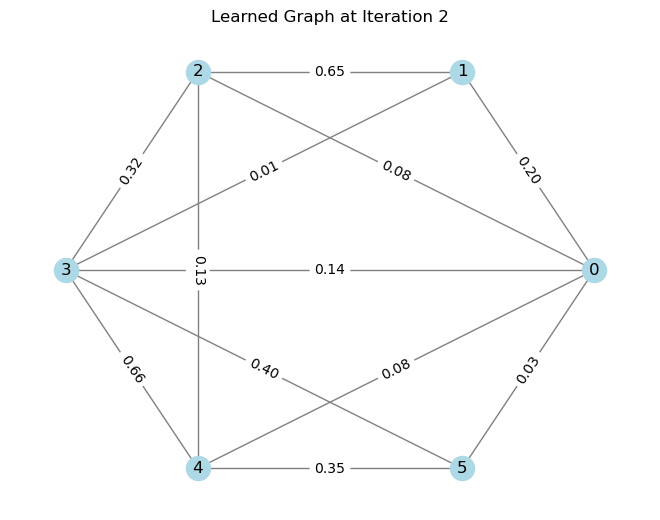

Iteration 3/5
after E-step: delta_W norm 0.1121, GLR 5.9888, adj norm^2 4.6571
after M-step-1: delta_W norm 0.4424, GLR 5.0621, adj norm^2 4.5722
PGD iter 1/50, ||S_new - S||_F = 0.1673
PGD iter 21/50, ||S_new - S||_F = 0.0953
PGD iter 41/50, ||S_new - S||_F = 0.0311
tensor([[0.0000, 0.7554, 0.6497, 0.5254, 0.5164, 0.5826],
        [0.7554, 0.0000, 0.4757, 0.0000, -0.0000, -0.0000],
        [0.6497, 0.4757, 0.0000, 0.2596, 0.0000, 0.0000],
        [0.5254, 0.0000, 0.2596, 0.0000, 0.3705, 0.3784],
        [0.5164, -0.0000, 0.0000, 0.3705, 0.0000, 0.4997],
        [0.5826, -0.0000, 0.0000, 0.3784, 0.4997, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.2525, grad_fn=<PowBackward0>)


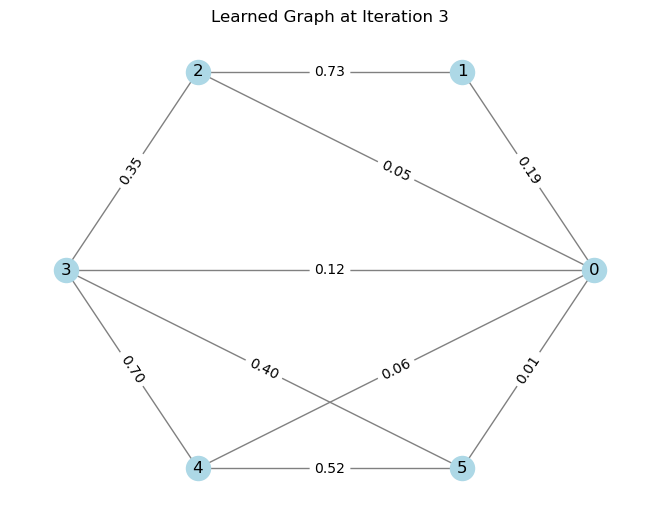

Iteration 4/5
after E-step: delta_W norm 0.5722, GLR 6.5220, adj norm^2 4.6128
after M-step-1: delta_W norm 0.7371, GLR 7.9452, adj norm^2 1.3605
PGD iter 1/50, ||S_new - S||_F = 0.1348
PGD iter 21/50, ||S_new - S||_F = 0.0973
PGD iter 41/50, ||S_new - S||_F = 0.0470
tensor([[0.0000, 0.5536, 0.5797, 0.0000, -0.0000, 0.4661],
        [0.5536, 0.0000, 0.4079, 0.0000, 0.0613, 0.0943],
        [0.5797, 0.4079, 0.0000, 0.1885, 0.2808, -0.0000],
        [0.0000, 0.0000, 0.1885, 0.0000, 0.3076, 0.3418],
        [-0.0000, 0.0613, 0.2808, 0.3076, 0.0000, 0.5889],
        [0.4661, 0.0943, -0.0000, 0.3418, 0.5889, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(2.8599, grad_fn=<PowBackward0>)


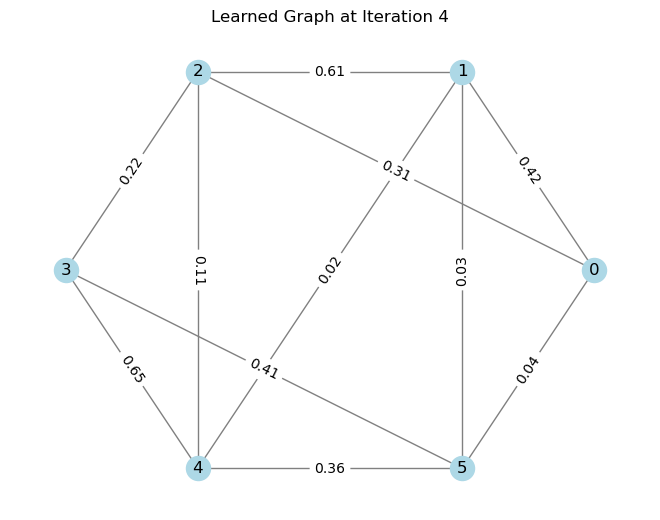

Iteration 5/5
after E-step: delta_W norm 0.6658, GLR 6.0951, adj norm^2 4.6143
after M-step-1: delta_W norm 1.6383, GLR 3.8792, adj norm^2 0.0547
PGD iter 1/50, ||S_new - S||_F = 0.1447


_LinAlgError: linalg.inv: The diagonal element 3 is zero, the inversion could not be completed because the input matrix is singular.

In [10]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.2481, GLR 4.2279, adj norm^2 6.0265
after M-step-1: delta_W norm 0.6428, GLR 5.0389, adj norm^2 7.0473
PGD iter 1/50, ||S_new - S||_F = 0.0449
PGD iter 21/50, ||S_new - S||_F = 0.0417
PGD iter 41/50, ||S_new - S||_F = 0.0375
tensor([[0.0000, 0.7258, 0.6534, 0.5517, 0.4835, 0.5506],
        [0.7258, 0.0000, 0.7417, 0.6182, 0.5474, 0.5673],
        [0.6534, 0.7417, 0.0000, 0.7018, 0.6270, 0.6196],
        [0.5517, 0.6182, 0.7018, 0.0000, 0.7716, 0.7183],
        [0.4835, 0.5474, 0.6270, 0.7716, 0.0000, 0.7083],
        [0.5506, 0.5673, 0.6196, 0.7183, 0.7083, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.2232, grad_fn=<PowBackward0>)


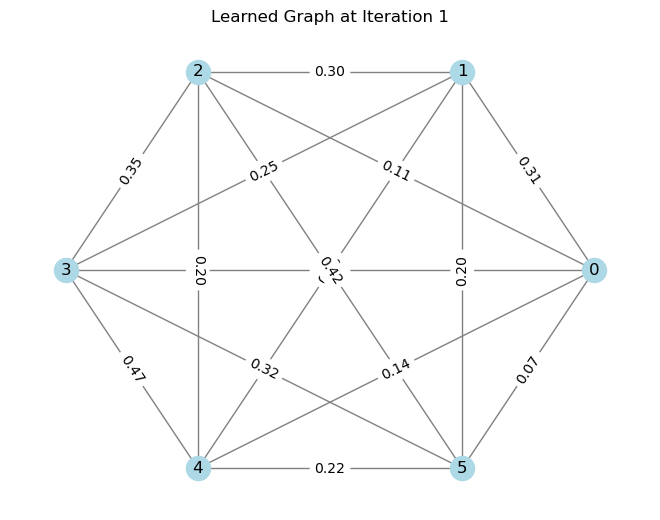

Iteration 2/5
after E-step: delta_W norm 0.6492, GLR 3.9632, adj norm^2 6.0024
after M-step-1: delta_W norm 0.6248, GLR 4.5176, adj norm^2 6.7694
PGD iter 1/50, ||S_new - S||_F = 0.0549
PGD iter 21/50, ||S_new - S||_F = 0.0507
PGD iter 41/50, ||S_new - S||_F = 0.0448
tensor([[0.0000, 0.7320, 0.6468, 0.4814, 0.3784, 0.5133],
        [0.7320, 0.0000, 0.7019, 0.5001, 0.3974, 0.3739],
        [0.6468, 0.7019, 0.0000, 0.6539, 0.5752, 0.4886],
        [0.4814, 0.5001, 0.6539, 0.0000, 0.7417, 0.6834],
        [0.3784, 0.3974, 0.5752, 0.7417, 0.0000, 0.6895],
        [0.5133, 0.3739, 0.4886, 0.6834, 0.6895, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(4.0356, grad_fn=<PowBackward0>)


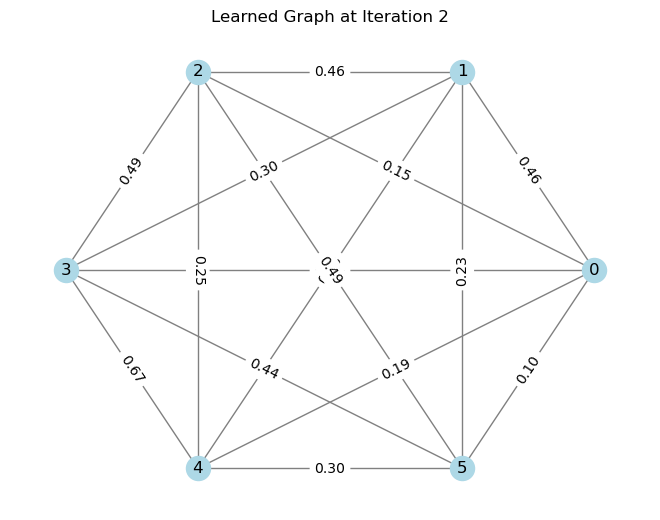

Iteration 3/5
after E-step: delta_W norm 0.6709, GLR 3.9028, adj norm^2 5.9380
after M-step-1: delta_W norm 0.7200, GLR 4.4301, adj norm^2 6.7655
PGD iter 1/50, ||S_new - S||_F = 0.0603
PGD iter 21/50, ||S_new - S||_F = 0.0557
PGD iter 41/50, ||S_new - S||_F = 0.0487
tensor([[0.0000, 0.7289, 0.6448, 0.4415, 0.3065, 0.4770],
        [0.7289, 0.0000, 0.6932, 0.4541, 0.3270, 0.2890],
        [0.6448, 0.6932, 0.0000, 0.6297, 0.5422, 0.4071],
        [0.4415, 0.4541, 0.6297, 0.0000, 0.7301, 0.6690],
        [0.3065, 0.3270, 0.5422, 0.7301, 0.0000, 0.6825],
        [0.4770, 0.2890, 0.4071, 0.6690, 0.6825, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.5015, grad_fn=<PowBackward0>)


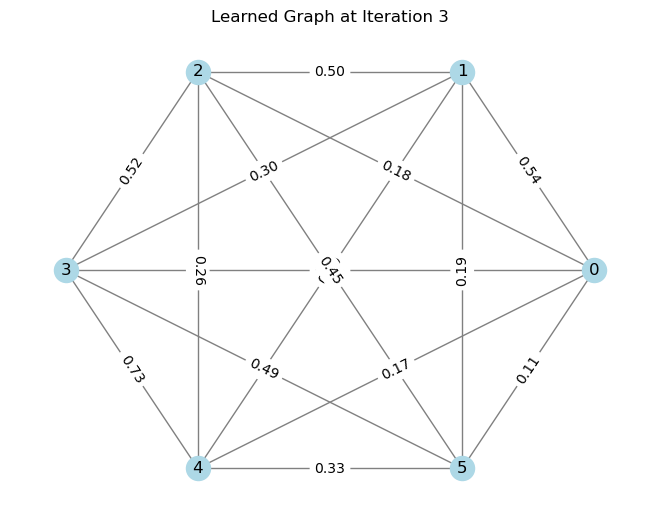

Iteration 4/5
after E-step: delta_W norm 0.7395, GLR 3.8782, adj norm^2 5.8822
after M-step-1: delta_W norm 0.8118, GLR 4.3759, adj norm^2 6.7710
PGD iter 1/50, ||S_new - S||_F = 0.0641
PGD iter 21/50, ||S_new - S||_F = 0.0592
PGD iter 41/50, ||S_new - S||_F = 0.0514
tensor([[0.0000, 0.7287, 0.6449, 0.4089, 0.2658, 0.4369],
        [0.7287, 0.0000, 0.6846, 0.4229, 0.2833, 0.2279],
        [0.6449, 0.6846, 0.0000, 0.6131, 0.5186, 0.3542],
        [0.4089, 0.4229, 0.6131, 0.0000, 0.7250, 0.6608],
        [0.2658, 0.2833, 0.5186, 0.7250, 0.0000, 0.6810],
        [0.4369, 0.2279, 0.3542, 0.6608, 0.6810, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.6947, grad_fn=<PowBackward0>)


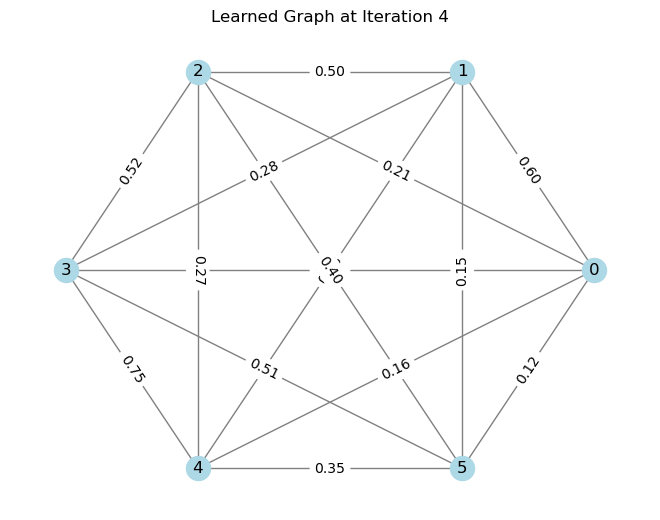

Iteration 5/5
after E-step: delta_W norm 0.8258, GLR 3.8589, adj norm^2 5.8270
after M-step-1: delta_W norm 0.8525, GLR 4.3097, adj norm^2 6.6969
PGD iter 1/50, ||S_new - S||_F = 0.0670
PGD iter 21/50, ||S_new - S||_F = 0.0618
PGD iter 41/50, ||S_new - S||_F = 0.0533
tensor([[0.0000, 0.7328, 0.6469, 0.3878, 0.2451, 0.4098],
        [0.7328, 0.0000, 0.6789, 0.3980, 0.2528, 0.1713],
        [0.6469, 0.6789, 0.0000, 0.5982, 0.4977, 0.3093],
        [0.3878, 0.3980, 0.5982, 0.0000, 0.7209, 0.6546],
        [0.2451, 0.2528, 0.4977, 0.7209, 0.0000, 0.6810],
        [0.4098, 0.1713, 0.3093, 0.6546, 0.6810, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.7834, grad_fn=<PowBackward0>)


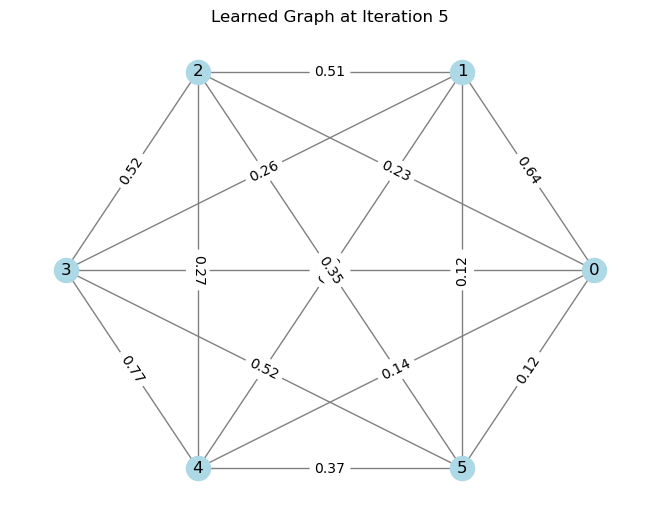

Final learned adjacency matrix:
tensor([[0.0000, 0.6403, 0.2258, 0.2500, 0.1443, 0.1206],
        [0.6403, 0.0000, 0.5126, 0.2630, 0.1563, 0.1196],
        [0.2258, 0.5126, 0.0000, 0.5196, 0.2679, 0.3514],
        [0.2500, 0.2630, 0.5196, 0.0000, 0.7698, 0.5154],
        [0.1443, 0.1563, 0.2679, 0.7698, 0.0000, 0.3727],
        [0.1206, 0.1196, 0.3514, 0.5154, 0.3727, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.7834, grad_fn=<PowBackward0>)


In [ ]:
arg_dict = {
    'mu': 0.4,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.0949, GLR 9.9822, adj norm^2 4.9682
after M-step-1: delta_W norm 0.2270, GLR 9.9246, adj norm^2 4.5346
PGD iter 1/50, ||S_new - S||_F = 0.1297
PGD iter 21/50, ||S_new - S||_F = 0.1010
PGD iter 41/50, ||S_new - S||_F = 0.0431
tensor([[0.0000, 0.6096, 0.3946, 0.2346, 0.1187, 0.1862],
        [0.6096, 0.0000, 0.5958, 0.1078, 0.0000, 0.0039],
        [0.3946, 0.5958, 0.0000, 0.3426, 0.1604, 0.1565],
        [0.2346, 0.1078, 0.3426, 0.0000, 0.5277, 0.4631],
        [0.1187, 0.0000, 0.1604, 0.5277, 0.0000, 0.5064],
        [0.1862, 0.0039, 0.1565, 0.4631, 0.5064, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.7904, grad_fn=<PowBackward0>)


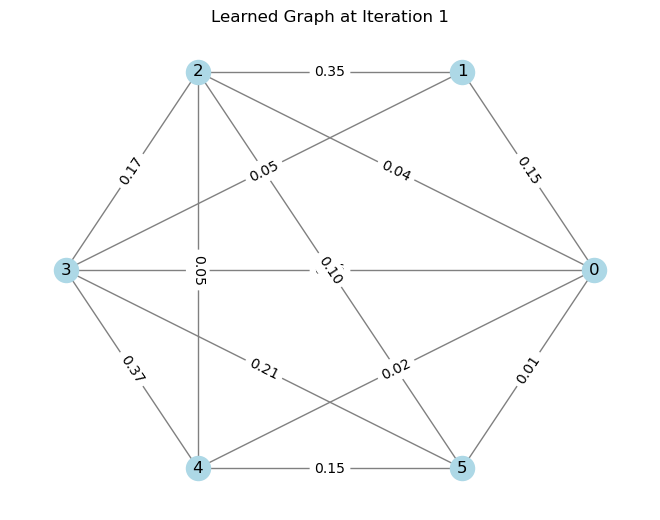

Iteration 2/5
after E-step: delta_W norm 0.2163, GLR 5.7962, adj norm^2 4.7092
after M-step-1: delta_W norm 0.7083, GLR 6.3081, adj norm^2 4.8485
PGD iter 1/50, ||S_new - S||_F = 0.2953
PGD iter 21/50, ||S_new - S||_F = 0.0886
PGD iter 41/50, ||S_new - S||_F = 0.0191
tensor([[0.0000, 0.3979, 0.3960, 0.0279, 0.0000, 0.0000],
        [0.3979, 0.0000, 0.4003, 0.0000, 0.0000, 0.0000],
        [0.3960, 0.4003, 0.0000, 0.3059, 0.0000, 0.0568],
        [0.0279, 0.0000, 0.3059, 0.0000, 0.3458, 0.2268],
        [0.0000, 0.0000, 0.0000, 0.3458, 0.0000, 0.3860],
        [0.0000, 0.0000, 0.0568, 0.2268, 0.3860, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.2179, grad_fn=<PowBackward0>)


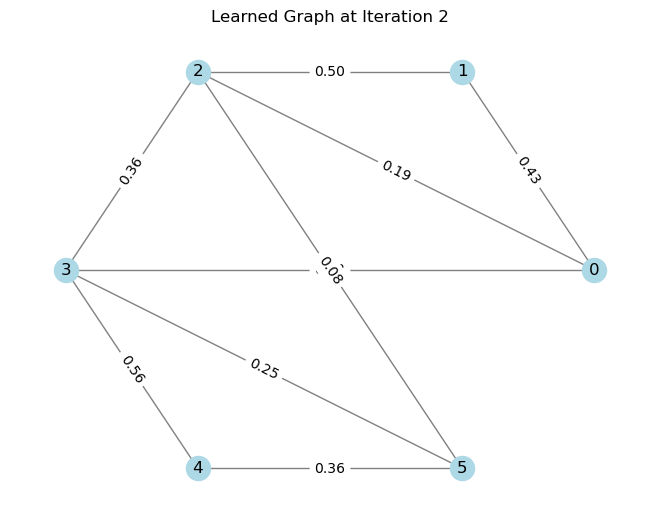

Iteration 3/5
after E-step: delta_W norm 0.7325, GLR 4.4834, adj norm^2 4.6258
after M-step-1: delta_W norm 1.1672, GLR 4.8495, adj norm^2 5.4764
PGD iter 1/50, ||S_new - S||_F = 0.4359
PGD iter 21/50, ||S_new - S||_F = 0.0506
PGD iter 41/50, ||S_new - S||_F = 0.0061
tensor([[0.0000, 0.2568, 0.3049, 0.0017, 0.0000, 0.0000],
        [0.2568, 0.0000, 0.2997, 0.0000, 0.0000, 0.0000],
        [0.3049, 0.2997, 0.0000, 0.2464, 0.0000, 0.0324],
        [0.0017, 0.0000, 0.2464, 0.0000, 0.2794, 0.1547],
        [0.0000, 0.0000, 0.0000, 0.2794, 0.0000, 0.3207],
        [0.0000, 0.0000, 0.0324, 0.1547, 0.3207, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(2.7878, grad_fn=<PowBackward0>)


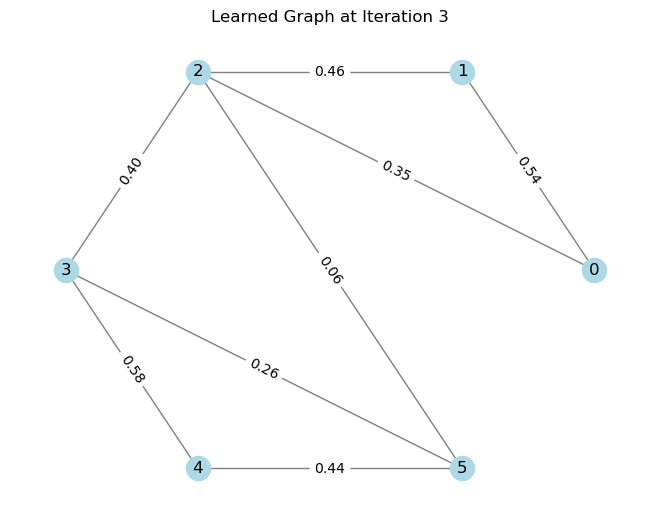

Iteration 4/5
after E-step: delta_W norm 1.0796, GLR 4.3171, adj norm^2 4.6043
after M-step-1: delta_W norm 1.1848, GLR 4.6993, adj norm^2 5.4313
PGD iter 1/50, ||S_new - S||_F = 0.5553
PGD iter 21/50, ||S_new - S||_F = 0.0369
PGD iter 41/50, ||S_new - S||_F = 0.0027
tensor([[0.0000, 0.2083, 0.2504, 0.0000, 0.0000, 0.0000],
        [0.2083, 0.0000, 0.2375, 0.0000, 0.0000, 0.0000],
        [0.2504, 0.2375, 0.0000, 0.2063, 0.0000, 0.0196],
        [0.0000, 0.0000, 0.2063, 0.0000, 0.2282, 0.1245],
        [0.0000, 0.0000, 0.0000, 0.2282, 0.0000, 0.2623],
        [0.0000, 0.0000, 0.0196, 0.1245, 0.2623, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.3127, grad_fn=<PowBackward0>)


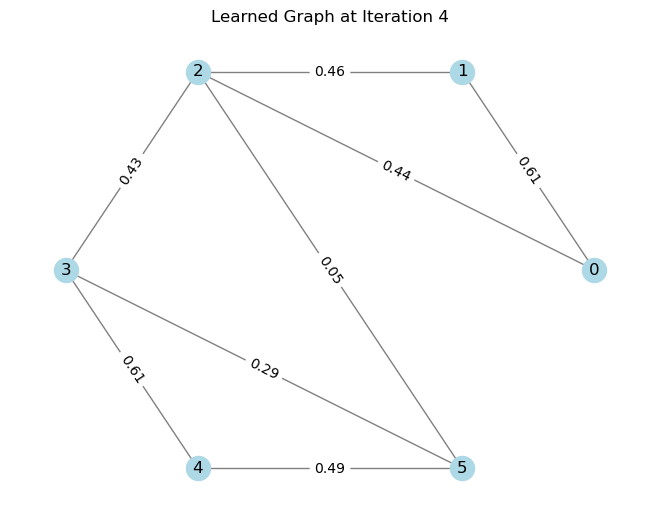

Iteration 5/5
after E-step: delta_W norm 1.1845, GLR 4.2765, adj norm^2 4.5936
after M-step-1: delta_W norm 1.1040, GLR 4.6481, adj norm^2 5.4415
PGD iter 1/50, ||S_new - S||_F = 0.6683
PGD iter 21/50, ||S_new - S||_F = 0.0291
PGD iter 41/50, ||S_new - S||_F = 0.1929
tensor([[0.0000, 0.1736, 0.2114, -0.0000, 0.0000, 0.0000],
        [0.1736, 0.0000, 0.1668, 0.0000, 0.0000, 0.0000],
        [0.2114, 0.1668, 0.0000, 0.1300, -0.0000, 0.0000],
        [-0.0000, 0.0000, 0.1300, 0.0000, 0.1764, 0.0831],
        [0.0000, 0.0000, -0.0000, 0.1764, 0.0000, 0.2153],
        [0.0000, 0.0000, 0.0000, 0.0831, 0.2153, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(2.9687, grad_fn=<PowBackward0>)


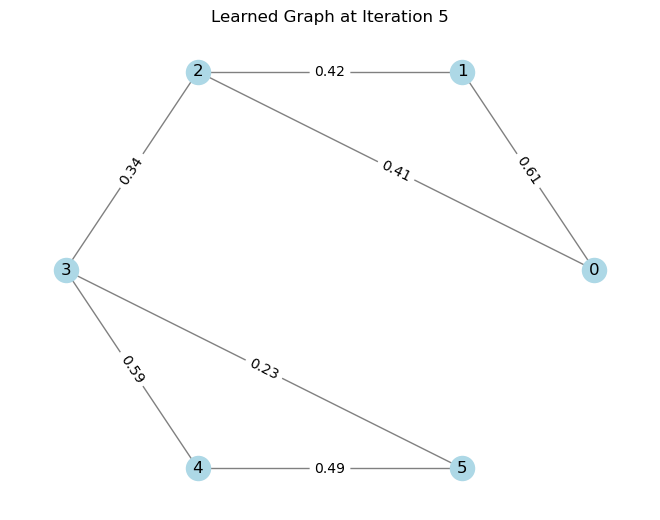

Final learned adjacency matrix:
tensor([[0.0000, 0.6100, 0.4141, -0.0000, 0.0000, 0.0000],
        [0.6100, 0.0000, 0.4230, 0.0000, 0.0000, 0.0000],
        [0.4141, 0.4230, 0.0000, 0.3420, -0.0000, 0.0000],
        [-0.0000, 0.0000, 0.3420, 0.0000, 0.5918, 0.2287],
        [0.0000, 0.0000, -0.0000, 0.5918, 0.0000, 0.4923],
        [0.0000, 0.0000, 0.0000, 0.2287, 0.4923, 0.0000]],
       grad_fn=<MulBackward0>) tensor(2.9687, grad_fn=<PowBackward0>)


In [ ]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.0949, GLR 9.9822, adj norm^2 4.9682
after M-step-1: delta_W norm 0.2270, GLR 9.9246, adj norm^2 4.5346
Block Coordinate PGD iter 1/100, ||S_new - S||_F = 0.1607
Block Coordinate PGD iter 21/100, ||S_new - S||_F = 0.0242
Block Coordinate PGD iter 41/100, ||S_new - S||_F = 0.0156
Block Coordinate PGD iter 61/100, ||S_new - S||_F = 0.0099
Block Coordinate PGD iter 81/100, ||S_new - S||_F = 0.0018
tensor([[0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.5115],
        [1.0000, 0.0000, 0.7251, 0.4232, 0.6083, 0.8821],
        [1.0000, 0.7251, 0.0000, 0.6858, 0.5826, 0.6850],
        [1.0000, 0.4232, 0.6858, 0.0000, 0.6519, 1.0000],
        [1.0000, 0.6083, 0.5826, 0.6519, 0.0000, 1.0000],
        [0.5115, 0.8821, 0.6850, 1.0000, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 1 tensor(2.7935, grad_fn=<PowBackward0>)


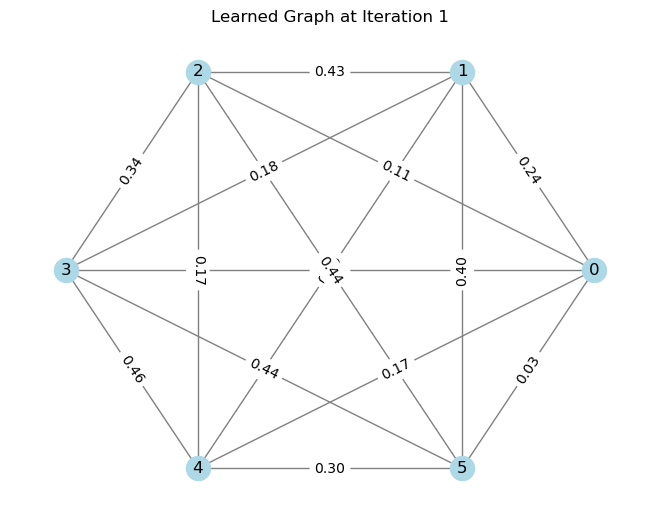

Iteration 2/5
after E-step: delta_W norm 0.2650, GLR 10.1572, adj norm^2 4.9363
after M-step-1: delta_W norm 0.1615, GLR 9.6423, adj norm^2 4.6001
Block Coordinate PGD iter 1/100, ||S_new - S||_F = 0.2003
Block Coordinate PGD iter 21/100, ||S_new - S||_F = 0.0341
Block Coordinate PGD iter 41/100, ||S_new - S||_F = 0.0200
Block Coordinate PGD iter 61/100, ||S_new - S||_F = 0.0042
Block Coordinate PGD iter 81/100, ||S_new - S||_F = 0.0016
tensor([[0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.5574],
        [1.0000, 0.0000, 0.5883, 0.2021, 0.4722, 0.6578],
        [1.0000, 0.5883, 0.0000, 0.5676, 0.4754, 0.4455],
        [1.0000, 0.2021, 0.5676, 0.0000, 0.4704, 1.0000],
        [1.0000, 0.4722, 0.4754, 0.4704, 0.0000, 1.0000],
        [0.5574, 0.6578, 0.4455, 1.0000, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 2 tensor(3.3002, grad_fn=<PowBackward0>)


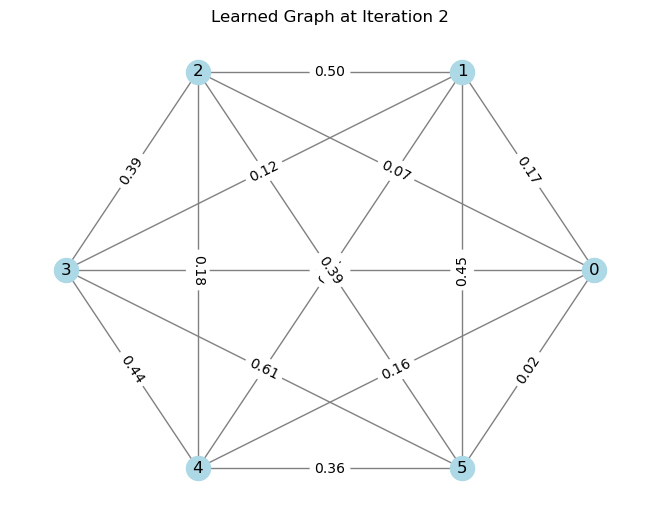

Iteration 3/5
after E-step: delta_W norm 0.1885, GLR 10.1636, adj norm^2 4.9145
after M-step-1: delta_W norm 0.4546, GLR 9.0774, adj norm^2 4.9127
Block Coordinate PGD iter 1/100, ||S_new - S||_F = 0.2433
Block Coordinate PGD iter 21/100, ||S_new - S||_F = 0.0462
Block Coordinate PGD iter 41/100, ||S_new - S||_F = 0.0140
Block Coordinate PGD iter 61/100, ||S_new - S||_F = 0.0049
Block Coordinate PGD iter 81/100, ||S_new - S||_F = 0.0012
tensor([[0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6601],
        [1.0000, 0.0000, 0.4863, 0.0000, 0.2047, 0.5896],
        [1.0000, 0.4863, 0.0000, 0.3568, 0.2936, 0.2568],
        [1.0000, 0.0000, 0.3568, 0.0000, 0.3098, 0.9511],
        [1.0000, 0.2047, 0.2936, 0.3098, 0.0000, 1.0000],
        [0.6601, 0.5896, 0.2568, 0.9511, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 3 tensor(3.2745, grad_fn=<PowBackward0>)


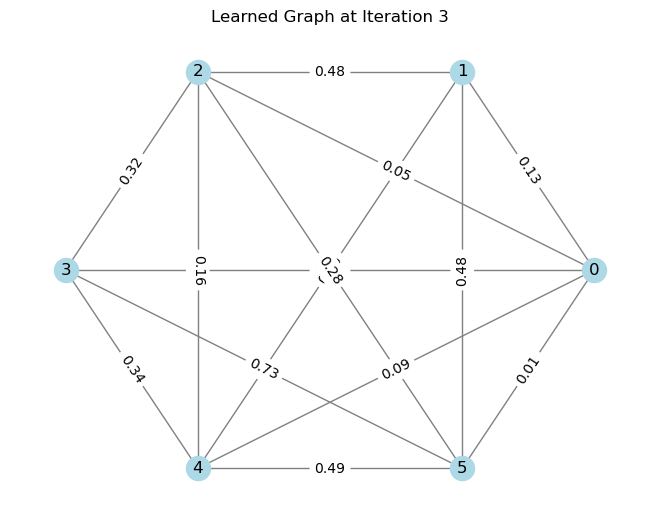

Iteration 4/5
after E-step: delta_W norm 0.5383, GLR 9.8456, adj norm^2 4.8439
after M-step-1: delta_W norm 0.7422, GLR 8.4378, adj norm^2 5.3641
Block Coordinate PGD iter 1/100, ||S_new - S||_F = 0.3252
Block Coordinate PGD iter 21/100, ||S_new - S||_F = 0.0524
Block Coordinate PGD iter 41/100, ||S_new - S||_F = 0.0085
Block Coordinate PGD iter 61/100, ||S_new - S||_F = 0.0036
Block Coordinate PGD iter 81/100, ||S_new - S||_F = 0.0013
tensor([[0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.7550],
        [1.0000, 0.0000, 0.2565, -0.0000, -0.0000, 0.0000],
        [1.0000, 0.2565, 0.0000, 0.0000, 0.1997, 0.0000],
        [1.0000, -0.0000, 0.0000, 0.0000, 0.3191, 0.8980],
        [1.0000, -0.0000, 0.1997, 0.3191, 0.0000, 1.0000],
        [0.7550, 0.0000, 0.0000, 0.8980, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 4 tensor(2.3688, grad_fn=<PowBackward0>)


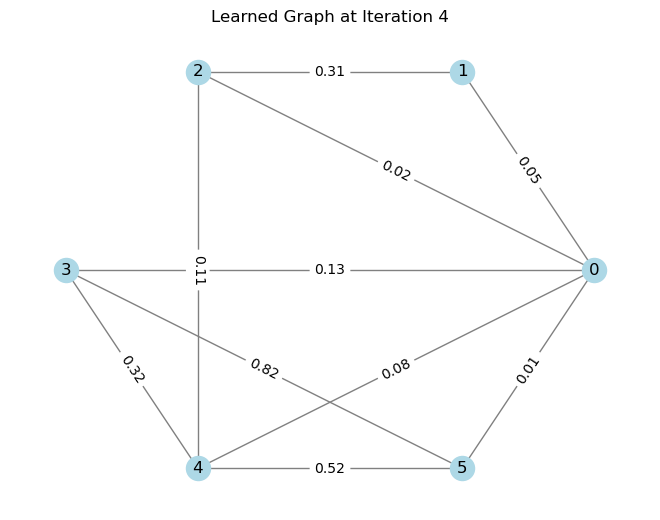

Iteration 5/5
after E-step: delta_W norm 0.8854, GLR 7.3086, adj norm^2 4.5936
after M-step-1: delta_W norm 1.2961, GLR 7.0200, adj norm^2 0.4741
Block Coordinate PGD iter 1/100, ||S_new - S||_F = 0.2420
Block Coordinate PGD iter 21/100, ||S_new - S||_F = 0.1366
Block Coordinate PGD iter 41/100, ||S_new - S||_F = 0.0490
Block Coordinate PGD iter 61/100, ||S_new - S||_F = 0.0917
Block Coordinate PGD iter 81/100, ||S_new - S||_F = 0.0423
tensor([[0.0000, 0.6524, 1.0000, 1.0000, 1.0000, 0.6368],
        [0.6524, 0.0000, 1.0000, 1.0000, 1.0000, 0.4609],
        [1.0000, 1.0000, 0.0000, -0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, -0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000],
        [0.6368, 0.4609, 1.0000, 1.0000, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 5 tensor(14.2632, grad_fn=<PowBackward0>)


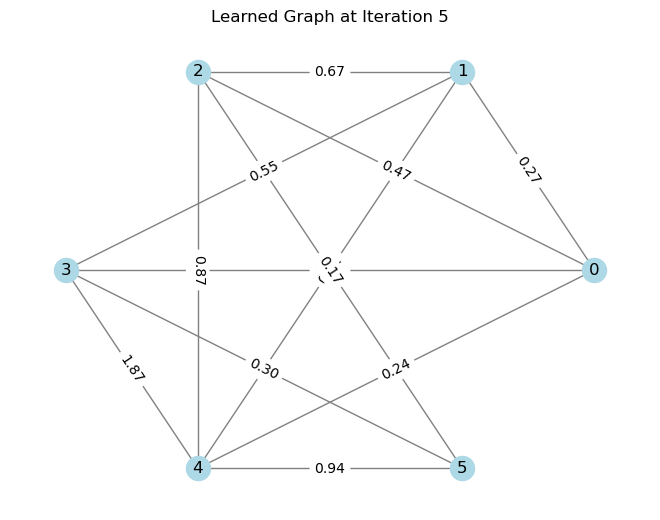

Final learned mask:
tensor([[0.0000, 0.6524, 1.0000, 1.0000, 1.0000, 0.6368],
        [0.6524, 0.0000, 1.0000, 1.0000, 1.0000, 0.4609],
        [1.0000, 1.0000, 0.0000, -0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, -0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000],
        [0.6368, 0.4609, 1.0000, 1.0000, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>) tensor(24.0869, grad_fn=<PowBackward0>) tensor([[0.0000, 0.0000, 0.3333, 0.3333, 0.3333, 0.0000],
        [0.0000, 0.0000, 0.3333, 0.3333, 0.3333, 0.0000],
        [0.2500, 0.2500, 0.0000, 0.0000, 0.2500, 0.2500],
        [0.2500, 0.2500, 0.0000, 0.0000, 0.2500, 0.2500],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.2000],
        [0.0000, 0.0000, 0.3333, 0.3333, 0.3333, 0.0000]],
       grad_fn=<SparsemaxFunctionBackward>)
Final learned adjacency matrix:
tensor([[0.0000, 0.2703, 0.4702, 0.8187, 0.2354, 0.0047],
        [0.2703, 0.0000, 0.6660, 0.5455, 0.3219, 0.0028],
        [0.4

In [13]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 100,
    'use_block_coordinate': True,
    'PGD_step_size': 0.05
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)